In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


English is not my native language, so I apologize for any mistakes.

In [2]:
# # View settings
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import from Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
# Dataset view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [3]:
# Loading data in CSV format
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">1. EDA</span>
</div>

In [4]:
# DataFrame Visualization
df.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8421  C18647  1163.222817           0.909091        0.0               0.0   
6727  C16915  1778.035758           1.000000      449.0             449.0   
6901  C17090   837.631184           1.000000        0.0               0.0   
6739  C16927  1038.465061           1.000000      264.8               0.0   
5448  C15601  2269.073907           1.000000      284.9             284.9   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8421                     0.0   2502.655964             0.000000   
6727                     0.0      0.000000             0.416667   
6901                     0.0    867.928181             0.000000   
6739                   264.8      0.000000             0.416667   
5448                     0.0    490.612381             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8421                    0.000000                          0.000000   
6727                    0.416667                          0.000000   
6901                    0.000000                          0.000000   
6739                    0.000000                          0.333333   
5448                    0.166667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8421                0.166667                 2              0        2500.0   
6727                0.000000                 0              7        3500.0   
6901                0.083333                 1              0        1000.0   
6739                0.000000                 0              5        1000.0   
5448                0.333333                 5              6        6000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8421  2937.305695        379.476760               0.0      12  
6727   429.538574        690.355456               0.0      12  
6901    47.144400       5413.385529               0.0      12  
6739   418.812352        773.534938               0.0      12  
5448   559.249010        786.402078               0.0      12

In [5]:
# Columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
# Dataset Size
df.shape

(8950, 18)

In [7]:
# General information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Dataset Data Types
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
# Unique values in each column
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
# Dataset Statistical Description
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [11]:
# Duplicate Fields
df.duplicated().sum()

0

In [12]:
# Null values in the Dataset
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

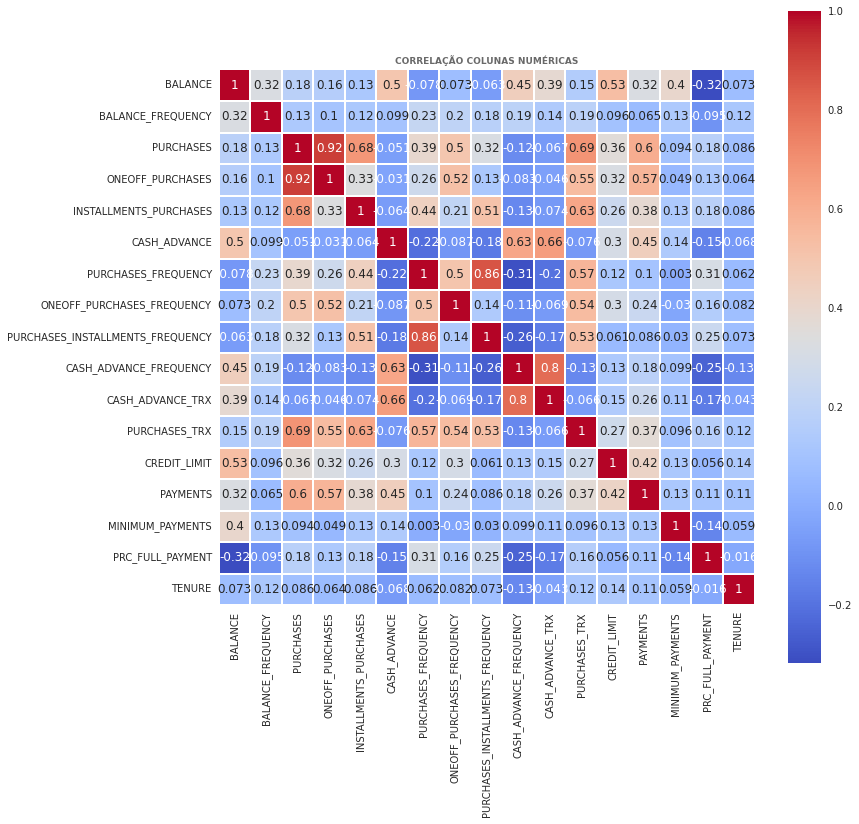

In [13]:
# Correlation between columns
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORRELAÇÃO COLUNAS NUMÉRICAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

In [14]:
# Listing numeric columns
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)

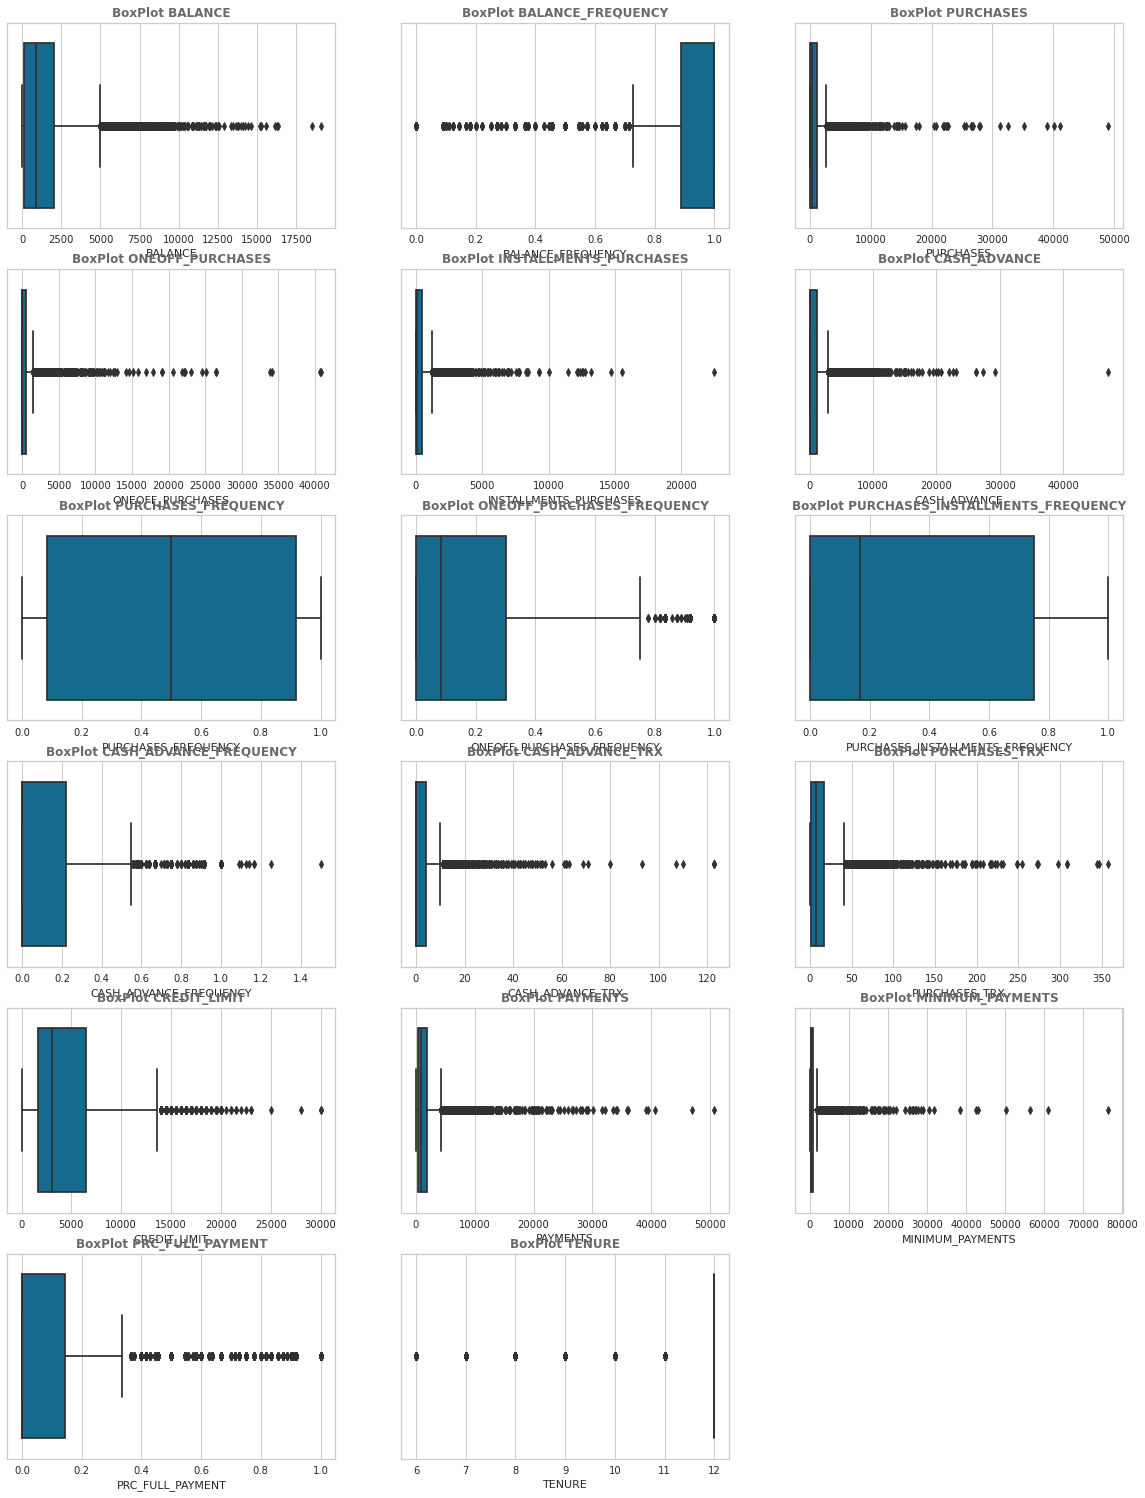

In [15]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

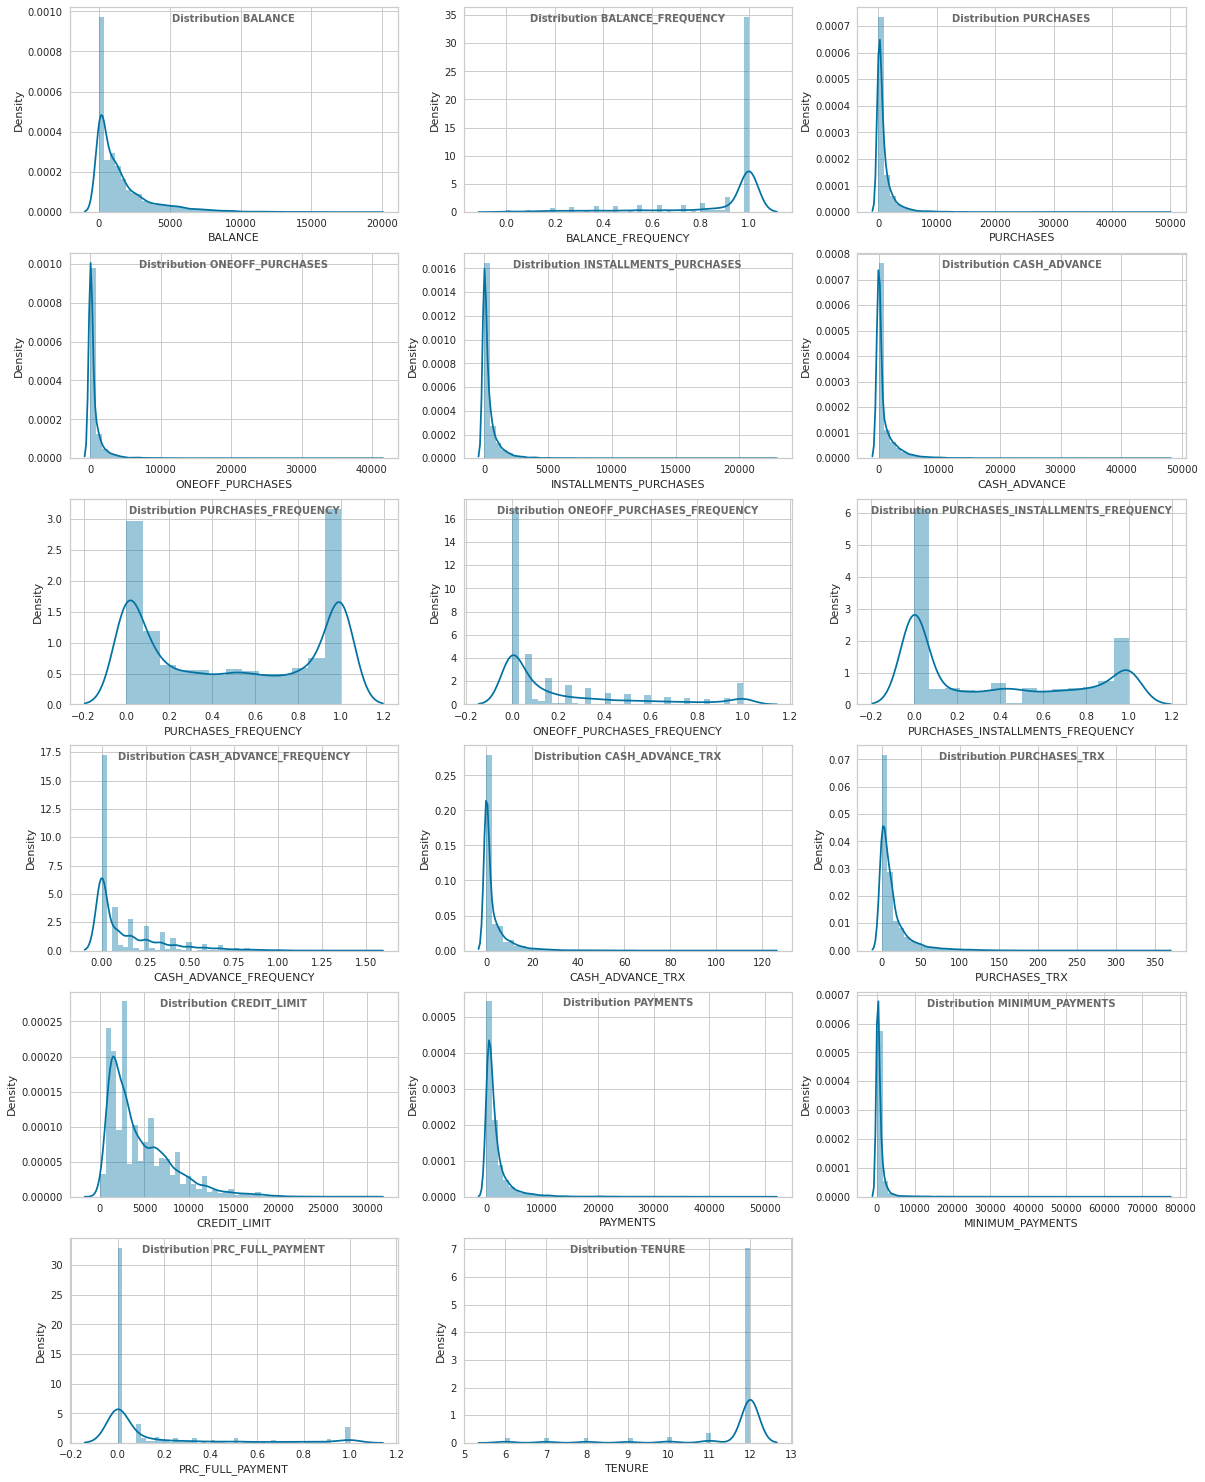

In [16]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">2. Pre-processing</span>
</div>

We can exclude the CUST_ID column as it is not relevant to our grouping model design.

In [17]:
# Deletion of the CUST_ID column
df.drop(['CUST_ID'], axis=1, inplace=True)

As previously verified, CREDIT_LIMIT has only one null value, so we can exclude this single null value without any problems.

In [18]:
# Deleting the null value in the CREDIT_LIMIT column
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In the MINIMUM_PAYMENTS column, 313 null values were found. In this case, it is more pertinent to replace these values with the median.

In [19]:
# Replacement of null values by the median
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df.MINIMUM_PAYMENTS = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1,1))[:,0]
df.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [20]:
# Dataset size after changes
df.shape

(8949, 17)

Through the exploratory analysis carried out, it was possible to identify an excess of discrepant values (outliers) in addition to the fact that the data have an asymmetrical distribution and are arranged in different scales. In order to deal with these obstacles, we will use normalization to place all columns on the same scale (0 to 1), and then we will apply the logarithmic transformation to have a more symmetrical distribution and smooth out the influence of outliers.

## 2.1 - Normalization

In [21]:
# Columns to apply Normalization
cols_norm = df.columns

In [22]:
# Copy of DataFrame
df_norm = df.copy()

In [23]:
# Creation of the normalizer
norm = MinMaxScaler()

In [24]:
# Apply the normalization
df_norm[cols_norm] = norm.fit_transform(df[cols_norm])

In [25]:
# Statistical Summary of Normalized Data
df_norm.describe().T

count      mean       std  min       25%  \
BALANCE                           8949.0  0.082163  0.109309  0.0  0.006741   
BALANCE_FREQUENCY                 8949.0  0.877350  0.236798  0.0  0.888889   
PURCHASES                         8949.0  0.020459  0.043572  0.0  0.000812   
ONEOFF_PURCHASES                  8949.0  0.014536  0.040724  0.0  0.000000   
INSTALLMENTS_PURCHASES            8949.0  0.018272  0.040195  0.0  0.000000   
CASH_ADVANCE                      8949.0  0.020768  0.044493  0.0  0.000000   
PURCHASES_FREQUENCY               8949.0  0.490405  0.401360  0.0  0.083333   
ONEOFF_PURCHASES_FREQUENCY        8949.0  0.202480  0.298345  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0  0.364478  0.397451  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            8949.0  0.090094  0.133422  0.0  0.000000   
CASH_ADVANCE_TRX                  8949.0  0.026415  0.055488  0.0  0.000000   
PURCHASES_TRX                     8949.0  0.041094  0.069437  0.0  0.002793   
CREDIT_LIMIT                      8949.0  0.148396  0.121496  0.0  0.051753   
PAYMENTS                          8949.0  0.034174  0.057080  0.0  0.007557   
MINIMUM_PAYMENTS                  8949.0  0.011059  0.030533  0.0  0.002236   
PRC_FULL_PAYMENT                  8949.0  0.153732  0.292511  0.0  0.000000   
TENURE                            8949.0  0.919656  0.222856  0.0  1.000000   

                                       50%       75%  max  
BALANCE                           0.045879  0.107880  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.007371  0.022638  1.0  
ONEOFF_PURCHASES                  0.000932  0.014176  1.0  
INSTALLMENTS_PURCHASES            0.003956  0.020829  1.0  
CASH_ADVANCE                      0.000000  0.023630  1.0  
PURCHASES_FREQUENCY               0.500000  0.916667  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.083333  0.300000  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.166667  0.750000  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.148148  1.0  
CASH_ADVANCE_TRX                  0.000000  0.032520  1.0  
PURCHASES_TRX                     0.019553  0.047486  1.0  
CREDIT_LIMIT                      0.098497  0.215359  1.0  
PAYMENTS                          0.016897  0.037485  1.0  
MINIMUM_PAYMENTS                  0.004089  0.010322  1.0  
PRC_FULL_PAYMENT                  0.000000  0.142857  1.0  
TENURE                            1.000000  1.000000  1.0

## 2.2 - Logarithmic Transformation 

In [26]:
# Apply logarithmic transformation to all columns
df_norm = df_norm.apply(lambda x: np.log(x + 1))

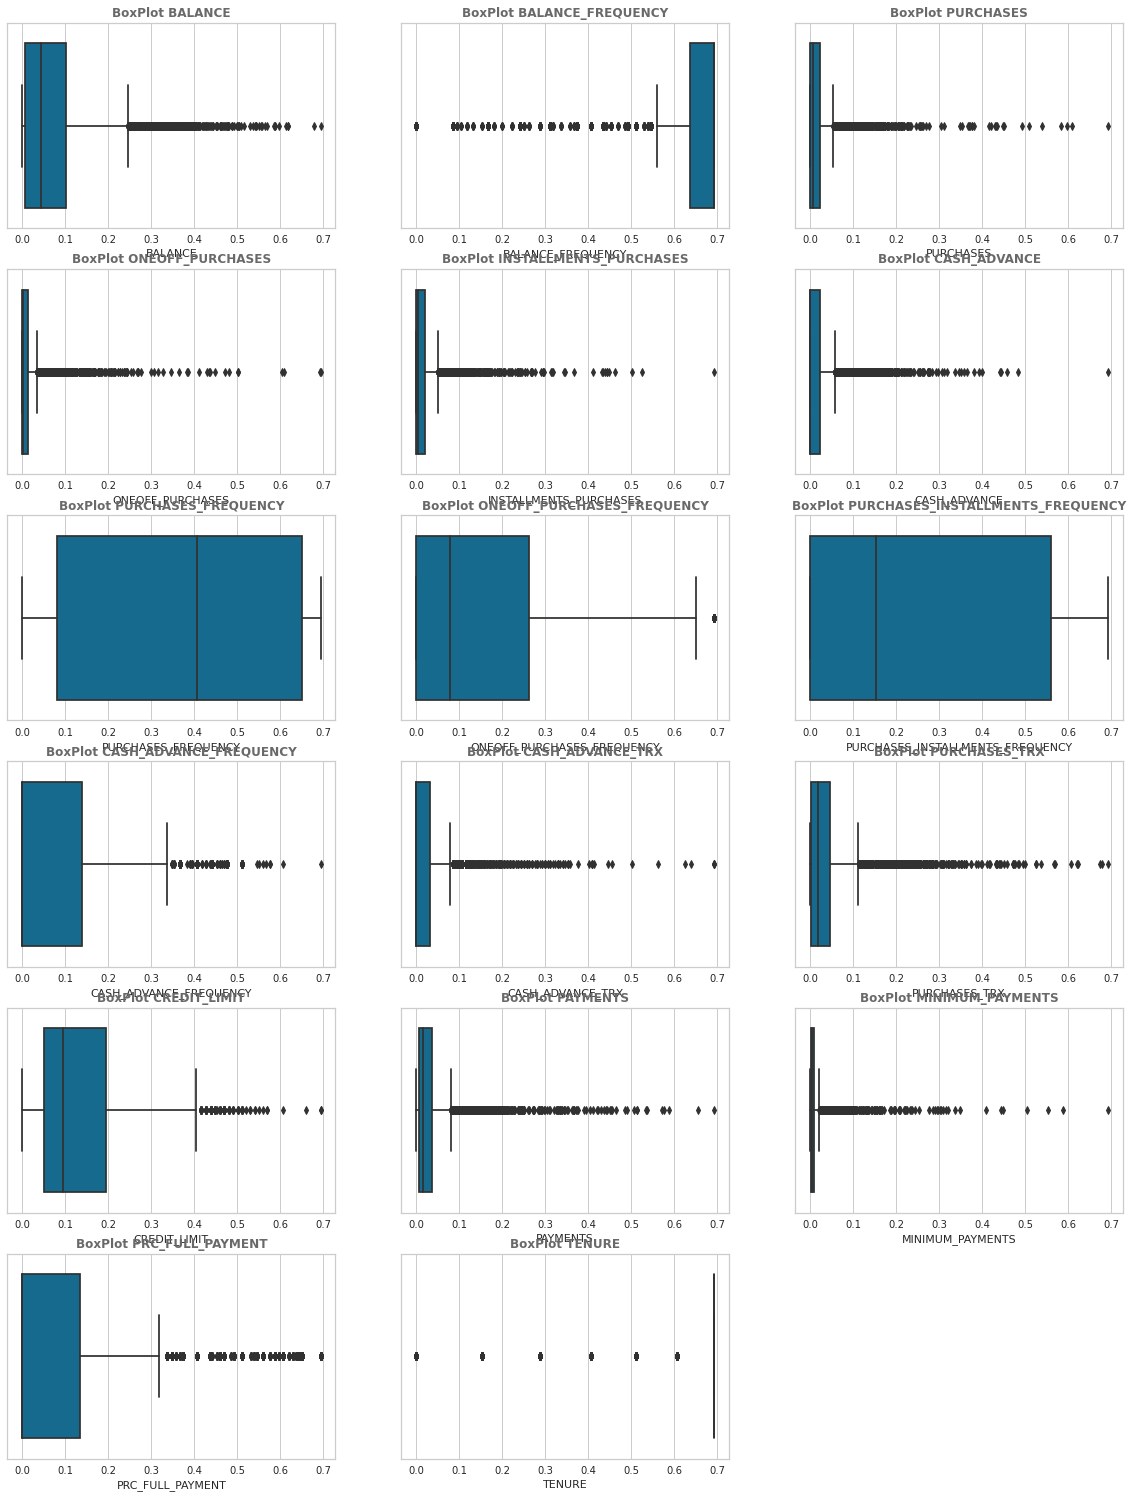

In [27]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df_norm[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

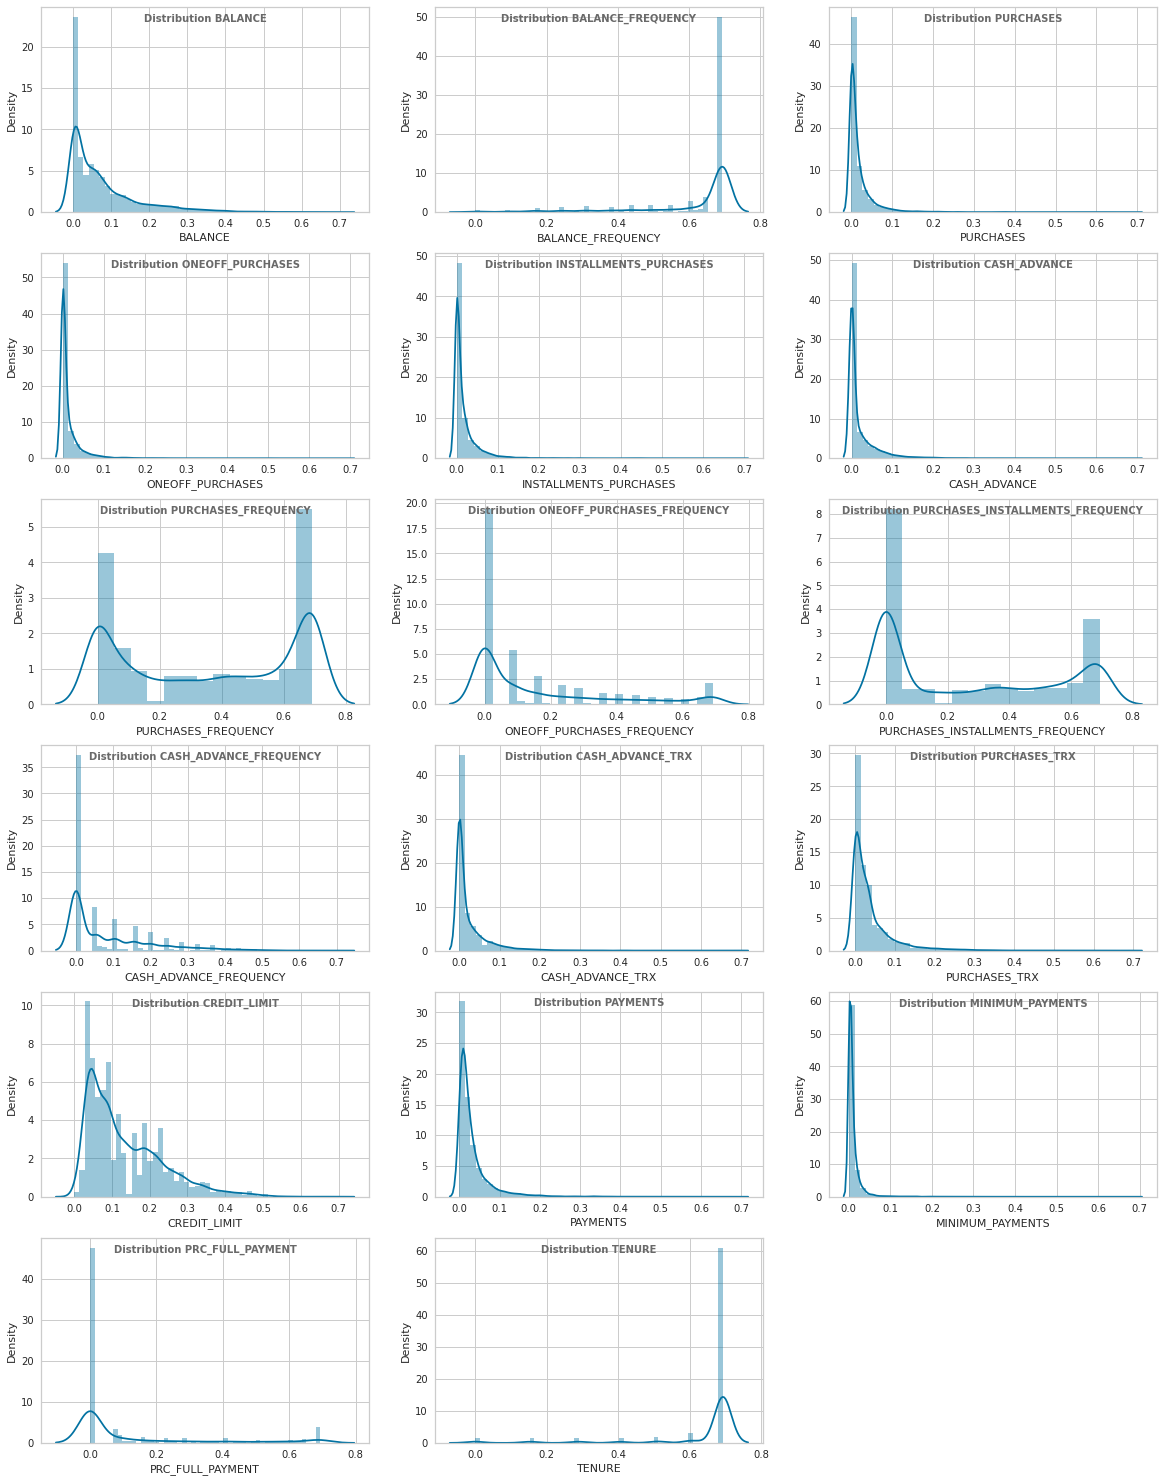

In [28]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df_norm[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

## 2.3 - Principal Component Analysis - PCA

Principal component analysis (PCA) is a method used in unsupervised machine learning that reduces high-dimensional data to lower dimensions while preserving as much information as possible. By using PCA before applying the clustering algorithm, it allows you to reduce dimensions, data noise and lower the computation cost. In this notebook, we're going to try to find the optimal number for this data set.

In [29]:
# Instantiate the PCA
pca = PCA()

# Apply the PCA
df_pca = pca.fit_transform(df_norm)

Amount of variation explained by each of the components:

In [30]:
# Table of the amount of variation explained
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Explained Variance'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

Percentage of variance explained by each of the selected components:

In [31]:
# Table of Percentage of Explained Variance
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
pev = (pca.explained_variance_ratio_) * 100
df_pev = pd.DataFrame(pev, columns=['Percentage of Explained Variance'])
df_pev = pd.concat([df_com, df_pev], axis=1)
df_pev.index = df_ev.index + 1
df_pev
df_pev.style.set_properties(**{'text-align': 'center'})

Cumulative percentage of variance explained by each of the selected components:

In [32]:
# Table Cumulative percentage of explained variance
num_com = range(1, 18)
com = pd.DataFrame(num_com, columns=['Number of Components'])
cpev = (pca.explained_variance_ratio_.cumsum()) * 100
df_cpev = pd.DataFrame(cpev, columns=['Cumulative Percentage of Explained Variance'])
df_cpev = pd.concat([df_com, df_cpev], axis=1)
df_cpev.index = df_cpev.index + 1
df_cpev
df_cpev.style.set_properties(**{'text-align': 'center'})

This tells us the amount of variance explained as we add principal components. PC1 alone explains 48%, PC1 and PC2 explain 63%, PC1, PC2 and PC3 explain 76%, and so on up to 100% explained by all 17 major components.

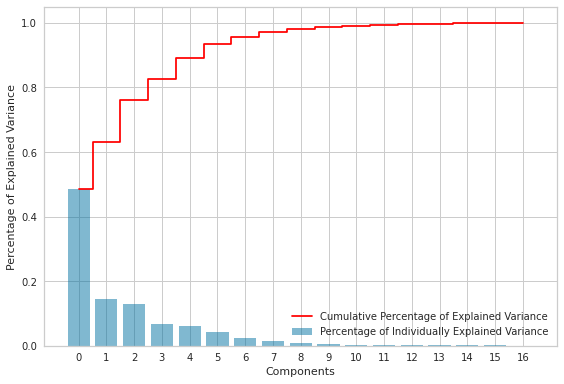

In [33]:
# Plot

# Instantiate the Percentage of Variance Explained
pve = pca.explained_variance_ratio_

# Instantiate the Cumulative Percentage of the Variance
pcve = np.cumsum(pve)

# Plot
plt.bar(range(0,len(pve)), pve, alpha=0.5, align='center', label='Percentage of Individually Explained Variance')
plt.step(range(0,len(pcve)), pcve, where='mid',label='Cumulative Percentage of Explained Variance', color='red')
plt.xticks(range(0, 17))
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In the graph shown, each bar illustrates the percentage of explained variation by individual components and the step graph displays the cumulative percentages of explained variation after applying PCA (Principal Components Analysis). The number of bars corresponds to the number of variables present in the original data set. With this chart, you can get an overview of how many components should be preserved.

Now let's plot a scree plot to select the principal components to keep, the scree plot is used to visualize the amount of variation in the data that is explained by each principal component generated by the PCA.

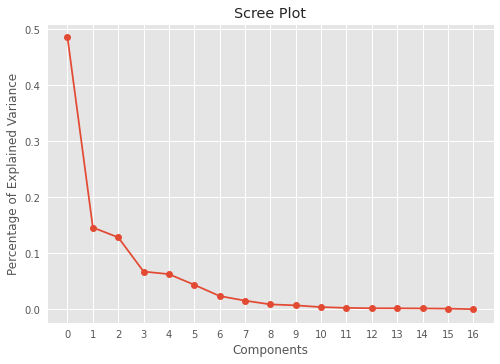

In [34]:
# Plot
plt.style.use('ggplot')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show();

The y-axis shows the percentage of variance explained and the x-axis the number of principal components. The sloped part of the graph represents the principal components that explain most of the variation in the data. These major components are generally considered the most important and should be selected. The flat part of the plot represents principal components that explain less of the variation in the data and can be discarded without significantly affecting the quality of the cluster. So, an ideal curve should be steep, then bend into an "elbow" (this is the cutoff point) and then flatten. Therefore, we select all components up to the point where the bend occurs in the Scree Plot. In the graphic above, we visually notice that the fold occurs with 4 components. So this must be our choice.

It is generally recommended to use at least 80% of the data variance when applying PCA, this is important because data variance represents the amount of information and diversity present in the data. The greater the variance of the data, the more information and diversity they contain. So, when using PCA to reduce the dimensionality of the data, the idea is to preserve as much information and diversity as possible.

Preserving the variance of the original data ensures that most of the information present in the original data is present in the reduced representation of the data. This is fundamental, because when using a reduced representation of the data, it is common that there is loss of information. Therefore, the more variance of the original data is preserved, the less information is lost.

Furthermore, by preserving the variance of the data, it is also possible to preserve the diversity of the data to ensure that the results obtained using the PCA are representative of the original data, and that they are possible to interpret.

In this way, let's check graphically if by choosing 4 components we have at least 80% of the data variation.

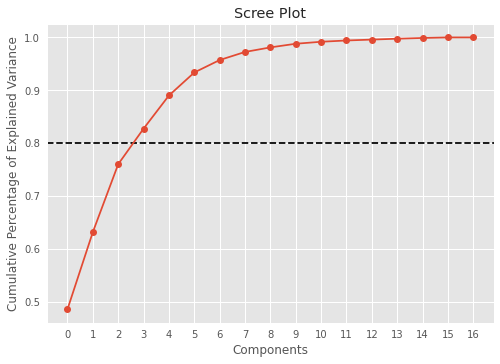

In [35]:
# Plot
plt.style.use('ggplot')
plt.axhline(y=0.8, color='black', linestyle='--')
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Cumulative Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show();

With 4 components we have a little more than 80% of the variation of the original data, which is an adequate choice.

In [36]:
# Apply PCA to 4 components
pca1 = PCA(n_components=4, random_state=18)
df_pca1 = pca1.fit_transform(df_norm)
df_pca1.shape

(8949, 4)

<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">3. Modeling</span>
</div>

## 3.1 - K-Means

Once we have found the optimal PCA number, we will use the K-Means clustering algorithm, it works by dividing the data into k groups based on the distances between the data points and the centroids, and interactively assigning each point to the group closest and recalculates the centroids until the groups change no more.

The number of k in the k-means algorithm must be provided beforehand. This number represents the number of groups (or clusters) into which the dataset will be divided. Choosing the correct number of k is important for the performance of the algorithm and for the interpretation of the results. Let's use some techniques and metrics to determine the ideal value of k.

**Elbow method:** It consists of plotting the inertia value (distortion score) which is the sum of the quadratic distances of the samples to the center of the closest cluster, in relation to the number of clusters and choosing the torsion point or "elbow" in the curve as the best value of k. This point is usually the point where the inertia starts to decrease more slowly, indicating that adding more clusters will not significantly improve clustering quality.

As the number of clusters increases, each cluster becomes smaller and more specific, allowing points within a cluster to be more similar to each other and less distant from its center. This causes the inertia to decrease, as the distances between the samples and their respective cluster centers are smaller, for this reason the inertia value tends to decrease when the number of clusters increases.

In other words, inertia measures the dissimilarity of the data within the cluster. The smaller the inertia, the smaller the dissimilarity, therefore, the better the clustering model in the k-means algorithm. However, it is important to highlight that inertia is a measure of internal dissimilarity and does not consider dissimilarity between clusters.

Let's test and evaluate 2 to 10 clusters for all metrics.

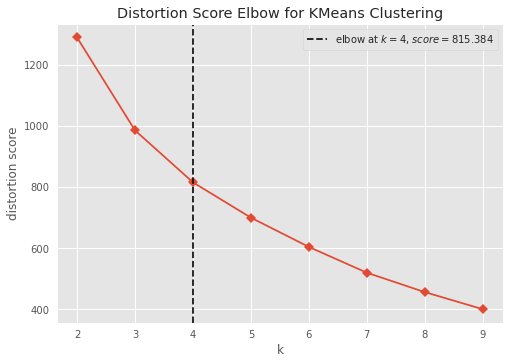

In [37]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Through the graph the ideal choice would be with 4 clusters.

**Silhoutte Score:** Measures how similar each sample is to the other points within its own cluster relative to the other clusters. A positive Silhouette value indicates that the sample is closer to points within its own cluster than to other clusters.

Silhouette values closer to 1 indicate that the samples are better clustered, while values closer to -1 indicate that the samples are poorly clustered and perhaps should be in another cluster. Values close to 0 indicate that the sample is "on the border" between two clusters.

The Silhouette metric is useful for evaluating clustering quality relative to other clusters, not just your own cluster, and is a good way to determine the correct number of clusters to choose.

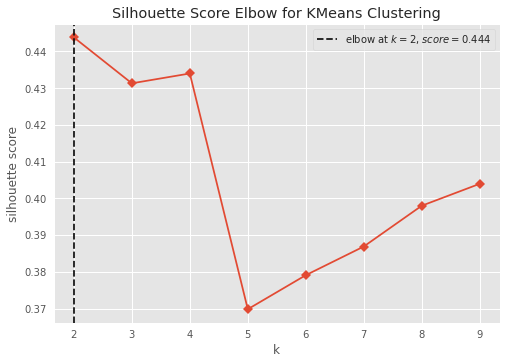

In [38]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Through the Silhouette score chart the best choice would be with 2 clusters.

**Calinski-Harabasz score:** Measures the relationship between variation within clusters (intra-cluster) and variation between clusters (inter-cluster). That is, it is based on the ratio between the sum of distances between points in a group and the mean of the group and the sum of distances between each point and the overall mean of the data. The higher the value of this metric, the better the clustering, as it indicates that the clusters are more distinct and compact, while a low value indicates that the clusters are overlapping and dispersed.

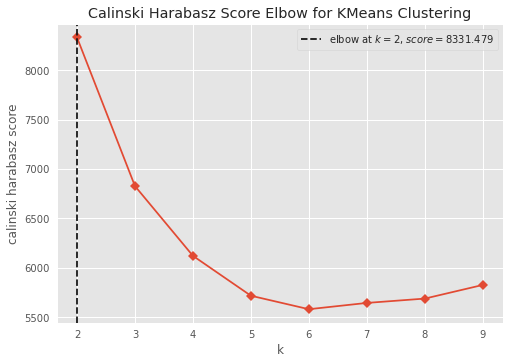

In [39]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Using the Calinski-Harabasz score graph, the best choice would also be with 2 clusters.

**Davies-Bouldin Score:** It is a measure of similarity between data samples in a cluster. It is calculated as the average of the distances between each data point and the nearest cluster center. Generally, the smaller the Davies-Bouldin value, the better the clustering model. This occurs because the Davies-Bouldin value measures the similarity between each cluster and its closest neighbors, and the smaller this value, the smaller the similarity, therefore, the better the separation between the clusters.

The graphs gave us a good idea, but let's evaluate all the values and put them in DataFrame format for a better general understanding.

In [40]:
# Evaluating metrics for several different cluster values

# Metrics

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 18)
    pred = kmeans.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Results
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin,
    'Inertia': inertia})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin      Inertia
0         2    0.443808        8331.478560        0.939435  1289.072718
2         4    0.433986        6121.705972        1.005715   815.386780
1         3    0.431311        6827.227169        1.131881   985.411788
7         9    0.403950        5827.133646        0.874072   400.593504
6         8    0.397981        5689.164164        0.938710   456.438621
8        10    0.389997        5724.592723        0.894033   368.068772
5         7    0.386876        5645.241729        1.006785   519.949188
4         6    0.379076        5581.639366        1.100599   604.139368
3         5    0.369813        5717.935353        1.120999   699.838150

The evaluation metrics for 2, 3 and 4 clusters showed the best results, but they don't differ much from each other, let's check how the distribution of clusters behaves in terms of the Silhouette coefficient.

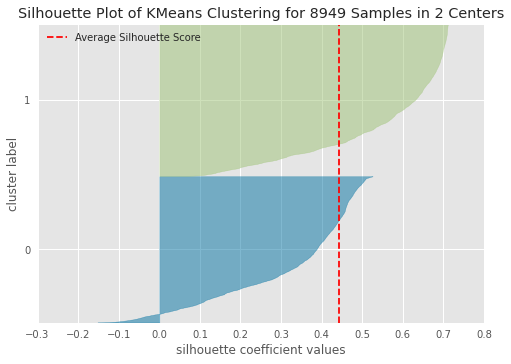

In [41]:
# Plot
model = KMeans(n_clusters=2, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

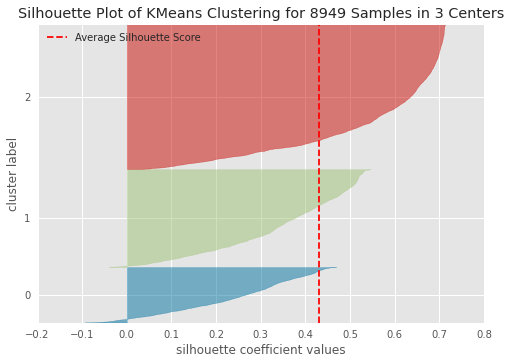

In [42]:
# Plot
model = KMeans(n_clusters=3, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

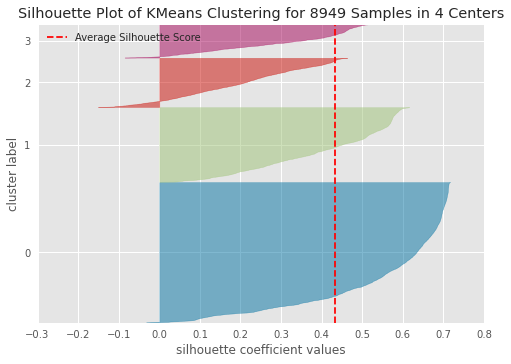

In [43]:
# Plot
model = KMeans(n_clusters=4, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

In all situations, each sample of clusters was above average in the Silhouette coefficient and presented a plausible balance in the distributions.

Para a escolha final do número de clusters no algoritmo K-Means vamos plotar um gráfico de dispersão para 2, 3, e 4 clusters com às três features mais valiosas para a tarefa de segmentação de clientes de cartões de crédito: PURCHASES, BALANCE e CREDIT_LIMIT, e averiguar o comportamento de cada.

For the final choice of the number of clusters in the K-Means algorithm, we will plot a scatter plot for 2, 3, and 4 clusters with the three most valuable features for the task of segmenting credit card customers: PURCHASES, BALANCE and CREDIT_LIMIT , and check the behavior of each.

2 Clusters

In [44]:
# Apply the K-Means algorithm to 2 Clusters
kmeans1 = KMeans(n_clusters=2, random_state=18)
kmeans1.fit(df_pca1)
labels1 = kmeans1.labels_

In [45]:
# Copy of the Original Dataframe
df1 = df.copy()

In [46]:
# Append clusters result to Dataframe
df1['cluster'] = labels1

In [47]:
# Quantity of each cluster
df1['cluster'].value_counts()

1    4557
0    4392
Name: cluster, dtype: int64

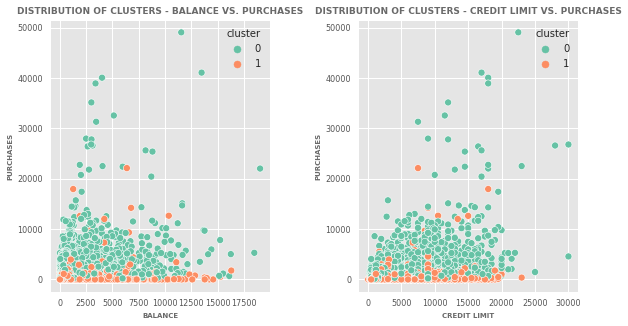

In [48]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - BALANCE VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('BALANCE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - CREDIT LIMIT VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CREDIT LIMIT', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

3 Clusters

In [49]:
# Apply the K-Means algorithm to 3 Clusters
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca1)
labels2 = kmeans2.labels_

In [50]:
# Copy of the Original Dataframe
df2 = df.copy()

In [51]:
# Append clusters result to Dataframe
df2['cluster'] = labels2

In [52]:
# Quantity of each cluster
df2['cluster'].value_counts()

2    4352
1    2933
0    1664
Name: cluster, dtype: int64

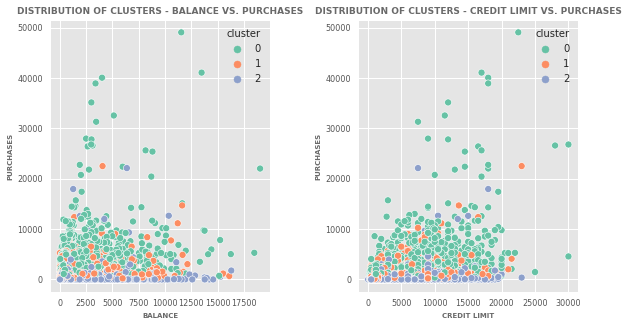

In [53]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df2, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - BALANCE VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('BALANCE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df2, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - CREDIT LIMIT VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CREDIT LIMIT', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

4 Clusters

In [54]:
# Apply the K-Means algorithm to 4 Cluster
kmeans3 = KMeans(n_clusters=4, random_state=18)
kmeans3.fit(df_pca1)
labels3 = kmeans3.labels_

In [55]:
# Copy of the Original Dataframe
df3 = df.copy()

In [56]:
# Append clusters result to Dataframe
df3['cluster'] = labels3

In [57]:
# Quantity of each cluster
df3['cluster'].value_counts()

0    4224
1    2245
2    1475
3    1005
Name: cluster, dtype: int64

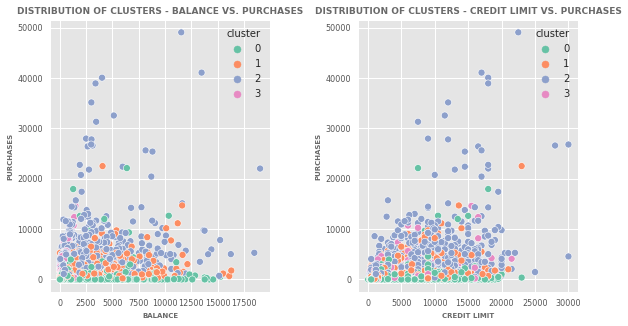

In [58]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df3, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - BALANCE VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('BALANCE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df3, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - CREDIT LIMIT VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CREDIT LIMIT', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

For 4 clusters it is not possible to clearly identify the last cluster visually and presents a more confusing distribution.

2 and 3 clusters present a more ordered distribution and it is possible to visually verify a certain distinction between the clusters. We will opt for 3 clusters, as we can obtain a more detailed segmentation on the characteristics of the customers, for example, from the graph we can see that individuals from group 0, 1 and 2 are the ones who make the most purchases in the respective order.

Previously we found that the best number of PCAs for the data was 4, now we are going to use PCAs equal to 2 in order to visualize the data through a 2-dimensional graph so that the grouping is visualized in a more ordered way.

In [59]:
# Apply PCA to 2 components for preview
pca2 = PCA(n_components= 2, random_state=18)
df_pca2 = pca2.fit_transform(df_norm)
df_pca2.shape

(8949, 2)

In [60]:
# K-Means Algorithm for 3 Clusters with 2 PCAs
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca2)
labels4 = kmeans2.labels_

In [61]:
# Copy of Dataframe with 2 PCAs
df_pca2_kmn = df_pca2.copy()

In [62]:
# Dataframe for two components
df_pca2_kmn = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca2_kmn = pd.concat([df_pca2_kmn, pd.DataFrame({'cluster':labels4})], axis=1)

In [63]:
# Table with 2 PCAs
df_pca2_kmn.head()

pca1      pca2  cluster
0 -0.323287 -0.093937        0
1 -0.448162 -0.030871        0
2  0.176913  0.629412        2
3 -0.411648  0.028061        0
4 -0.397398  0.023580        0

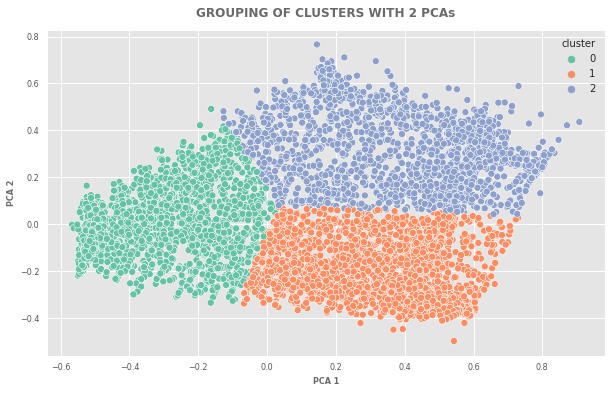

In [64]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_kmn, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [65]:
# Final K-Means model

# Metrics
metrics = []

kmeans = KMeans(n_clusters= 3, random_state = 18)
pred = kmeans.fit_predict(df_pca1)

model = 'K-Means'
n_clusters = 3
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_kmn = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_kmn

Model  Number of Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0  K-Means                   3    0.431311        6827.227169        1.131881

## 3.2 - DBSCAN

Density-based algorithm that seeks to group points that are close to each other and separate those that are far from each other. It works by setting two parameters: eps and min_samples. The eps is used to define the maximum distance between two points for them to be considered neighbors, while the min_samples is the minimum number of points in an eps for a point to be considered as a "cluster center". DBSCAN then identifies areas of high density and marks them as clusters, while isolated points are marked as noise.

The DBSCAN algorithm defines clusters based on density, that is, the distance between points. The eps parameter is the maximum distance a point can be from another point for the two points to be considered part of the same cluster. The higher the eps value, the more points will be included in a cluster and therefore the clusters will be wider. On the other hand, the smaller the eps value, the fewer points will be included in a cluster and, therefore, the clusters will be narrower.

The distance between the closest points can be used as an estimate for the eps value. This is where NearestNeighbors comes in, an unsupervised learning algorithm that can be used to calculate the distances between the k nearest neighbors of each point. By plotting these distances in ascending order, you can see the point where the graph starts to grow rapidly, which indicates that clusters are forming. This point can be used as an estimate for the eps value.

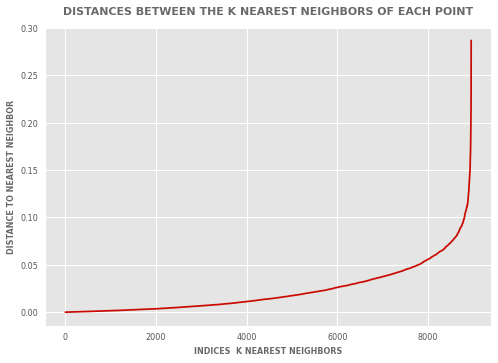

In [66]:
# NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(df_pca1)

# Calculating the distances and indices of the k nearest neighbors
distances, indices = nbrs.kneighbors(df_pca1)

# Plot
plt.plot(sorted(distances[:,1]), 'r-')
plt.title('DISTANCES BETWEEN THE K NEAREST NEIGHBORS OF EACH POINT', fontsize = 11, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('INDICES  K NEAREST NEIGHBORS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('DISTANCE TO NEAREST NEIGHBOR', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In this example, the NearestNeighbors object is used to calculate the distances between the closest points. The generated graph shows these ordered distances, allowing the choice of a suitable eps value. The point where the graph starts to grow rapidly is a good candidate for the eps value, as it indicates that clusters are forming. In this way, we can see that the value of eps where the growth of the graph occurs is with the value of 0.05.

However, it is important to consider that the value of min_samples interacts with the value of eps, so it is necessary to test different combinations of values of eps and min_samples, we will use GridSearchCV to find the best combination between these two parameters.

In [67]:
# Defines the parameter search space
param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

# Create the DBSCAN object
dbscan = DBSCAN()

# Creates the GridSearchCV object
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

# Run the grid search
grid_search.fit(df_pca1)

# Displays the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'eps': 0.01, 'min_samples': 2}


In [68]:
# Instance of DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca1)

# Getting the cluster labels
labels = dbscan.labels_

In [69]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 607
Estimated number of noise points: 5173


Inconceivable number of clusters to perform a segmentation analysis.

Let's check the best combinations of eps and min_samples through a nested loop.

In [70]:
# Evaluating metrics for several different cluster values

# Metrics

eps =[]
min_samples = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters = []
metrics_dbscan = []

for eps in np.linspace(0.01,0.10, num=5):
    for min_sample in range(2, 60, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_pca1)
        pred = dbscan.labels_

        silhouette = silhouette_score(df_pca1, pred)
        calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
        davies_bouldin = davies_bouldin_score(df_pca1, pred)
        metrics_dbscan.append((eps, min_sample, silhouette, calinski_harabasz, davies_bouldin, len(set(dbscan.labels_))) )

df_dbscan = pd.DataFrame(metrics_dbscan, columns=['Eps', 'Min Samples', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Number of Clusters'])
df_dbscan.sort_values('Silhouette', ascending=False).head(10)

Eps  Min Samples  Silhouette  Calinski Harabasz  Davies Bouldin  \
46  0.0775           52    0.160683        1925.648615        1.365359   
55  0.1000           37    0.104890         416.732471        1.865837   
56  0.1000           42    0.103872         423.532283        1.858772   
57  0.1000           47    0.103200         428.275735        1.852370   
45  0.0775           47    0.079085         658.138477        2.073393   
58  0.1000           52    0.078401         399.019226        1.634520   
59  0.1000           57    0.077118         485.435528        1.801495   
50  0.1000           12    0.060234         135.716906        1.784752   
44  0.0775           42    0.057780         502.188111        1.742273   
43  0.0775           37    0.055484         395.452513        1.569016   

    Number of Clusters  
46                   5  
55                   4  
56                   4  
57                   4  
45                   3  
58                   5  
59                   4  
50                   5  
44                   4  
43                   5

The best combination was eps=0.0775 and min_samples = 52.

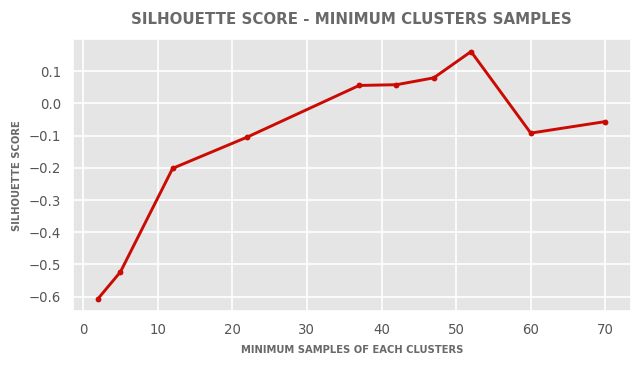

In [71]:
# Plot 

silhouette_coefs = []

for min_points in [2, 5, 12, 22, 37, 42, 47, 52, 60, 70]:
    db = DBSCAN(eps = 0.0775, min_samples = min_points)
    db.fit(df_pca1)
    silhouette_coefs.append(silhouette_score(df_pca1, db.labels_))
    
plt.figure(figsize = (6, 3), dpi = 120)
plt.plot([2, 5, 12, 22, 37, 42, 47, 52, 60, 70], silhouette_coefs, color = 'r', marker = '.')
plt.title('SILHOUETTE SCORE - MINIMUM CLUSTERS SAMPLES', fontsize = 9, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('MINIMUM SAMPLES OF EACH CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('SILHOUETTE SCORE', color = 'dimgrey', fontweight = 'bold', fontsize = 6)
plt.show();

In [72]:
# DBSCAN instance
dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)

# Getting the cluster labels
dbscan_labels = dbscan.labels_

In [73]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 3937


Let's check the distribution of clusters with the most elementary features for the business problem.

In [74]:
# Copy of the original Dataframe
df_bscan = df.copy()

In [75]:
# Append DBSCAN clusters result to Dataframe
df_bscan['cluster'] = dbscan_labels

In [76]:
# Quantity of each cluster
df_bscan['cluster'].value_counts()

-1    3937
 1    3257
 2    1583
 0     104
 3      68
Name: cluster, dtype: int64

NOTE: The value of -1 represents samples that have not been assigned to any cluster.

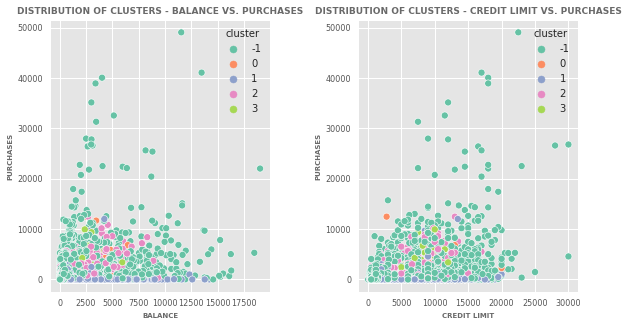

In [77]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_bscan, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - BALANCE VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('BALANCE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_bscan, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - CREDIT LIMIT VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CREDIT LIMIT', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

In [78]:
# Copy of Dataframe with 2 PCAs
df_pca2_db = df_pca2.copy()

In [79]:
# Dataframe for two components
df_pca2_db = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca2_db = pd.concat([df_pca2_db, pd.DataFrame({'cluster':dbscan_labels})], axis=1)

In [80]:
# Table with 2 PCAs
df_pca2_db.head()

pca1      pca2  cluster
0 -0.323287 -0.093937       -1
1 -0.448162 -0.030871        1
2  0.176913  0.629412        0
3 -0.411648  0.028061        1
4 -0.397398  0.023580        1

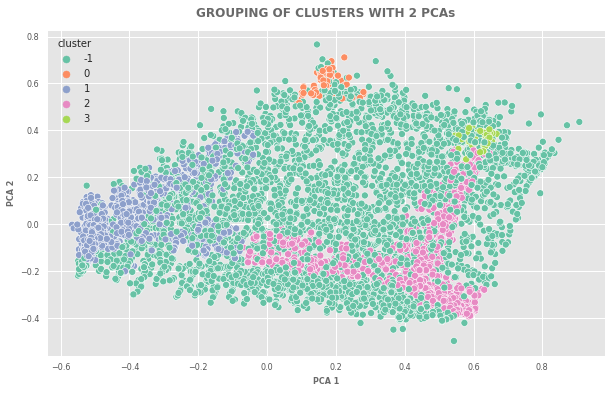

In [81]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_db, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [82]:
# Final DBSCAN model

# Metrics
metrics = []

dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)
pred = dbscan.labels_

model = 'DBSCAN'
n_clusters = 4
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_db = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_db

Model  Number of Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0  DBSCAN                   4    0.160683        1925.648615        1.365359

## 3.3. Hierarchical Clustering

Agglomerative hierarchical clustering is based on a hierarchy that starts with each data point as an individual cluster and then gradually combines the closest clusters until all data points are grouped into a single cluster. This is done by calculating the distance between the clusters and choosing the one with the shortest distance to combine. This process is repeated until all data points are grouped into a single cluster or until the desired number of clusters is reached.

A simple and intuitive way to determine the number of clusters in a hierarchical cluster is to draw a horizontal line across the dendrogram and divide into a specific number of sections, each representing a cluster.

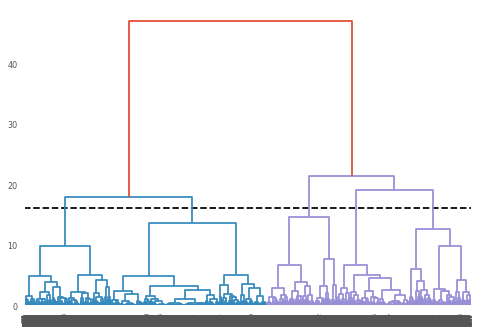

In [83]:
# Plot

dend = linkage(df_pca1, 'ward')
plt.axhline(y=16, color='black', linestyle='--')
dendrogram(dend)
plt.show();

From the Dendrogram 5 clusters seems to be a reasonable choice. However, let's check out other clustering metrics.

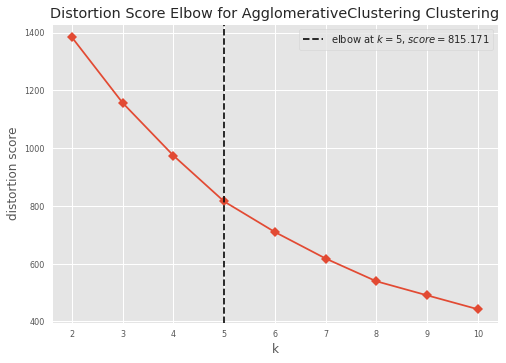

In [84]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

The Elbow Method also indicated 5 as the ideal number of clusters.

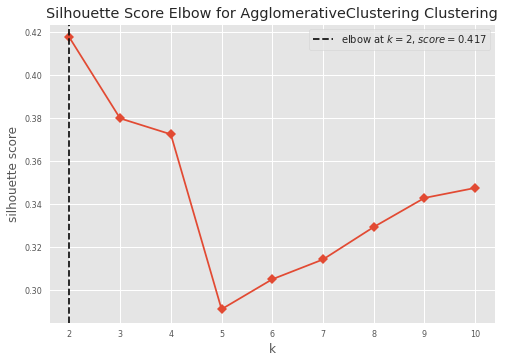

In [85]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='silhouette', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Through the Silhoutte score, 2 clusters appears to be the best result and surprisingly, unlike the other two previous metrics, 5 clusters appeared to be the worst choice.

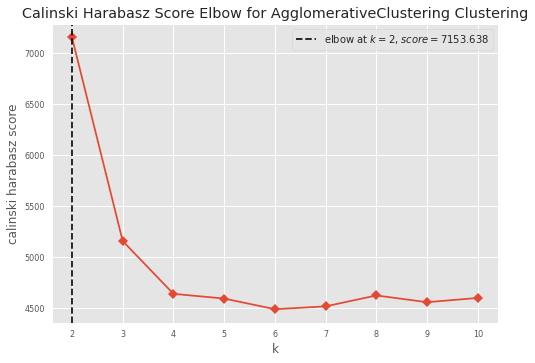

In [86]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

The Calinski-Harabasz score also marks the best result as being equal to 2 clusters.

Let's look at all the metrics (including the Davies-Bouldin score) from 2 to 10 clusters in a table.

In [87]:
# Evaluating metrics for several different cluster values

# Metrics

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    pred = ac.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Results
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0         2    0.417459        7153.638491        1.030964
1         3    0.379865        5156.439859        1.317517
2         4    0.372482        4638.606194        1.117199
8        10    0.347565        4598.444426        1.004862
7         9    0.342922        4556.663339        1.054034
6         8    0.329422        4622.830768        1.041481
5         7    0.314361        4515.833397        1.043774
4         6    0.305166        4487.907964        1.124842
3         5    0.291257        4592.553055        1.220793

Now we can clearly ratify that 2 clusters really have the best values.

In [88]:
# Create a hierarchical grouping model
hc = AgglomerativeClustering(n_clusters=2)

# Fit the model to the data
hc.fit(df_pca1)

# Prints the labels for each example
hc_labels = hc.labels_

In [89]:
# Copy of the original Dataframe
df_hc = df.copy()

In [90]:
# Append the result of the hierarchical grouping clusters to the Dataframe
df_hc['cluster'] = hc_labels

In [91]:
# Quantity of each cluster
df_hc['cluster'].value_counts()

1    4860
0    4089
Name: cluster, dtype: int64

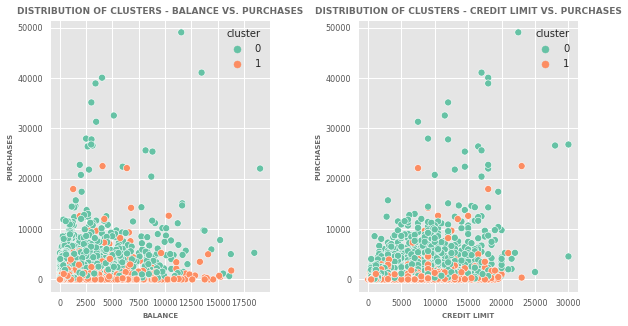

In [92]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_hc, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - BALANCE VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('BALANCE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_hc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUTION OF CLUSTERS - CREDIT LIMIT VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CREDIT LIMIT', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

In [93]:
# Copy of Dataframe with 2 PCAs
df_pca2_db = df_pca2.copy()

In [94]:
# Dataframe for two components
df_pca2_hc = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca2_hc = pd.concat([df_pca2_hc, pd.DataFrame({'cluster':hc_labels})], axis=1)

In [95]:
# Table with 2 PCAs
df_pca2_hc.head()

pca1      pca2  cluster
0 -0.323287 -0.093937        1
1 -0.448162 -0.030871        1
2  0.176913  0.629412        0
3 -0.411648  0.028061        1
4 -0.397398  0.023580        1

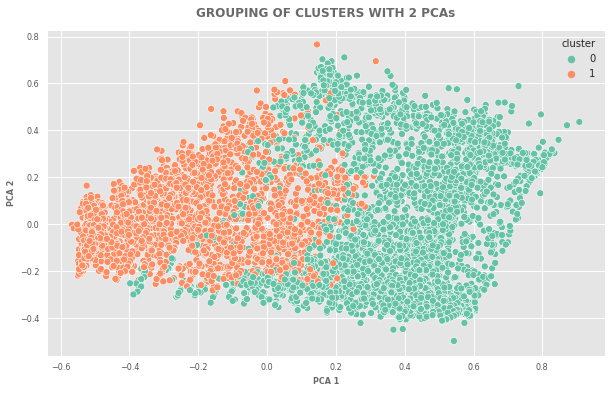

In [96]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_hc, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [97]:
# Final Hierarchical Clustering Model

# Metrics
metrics = []

hc = AgglomerativeClustering(n_clusters=2)
pred = hc.fit_predict(df_pca1)

model = 'Hierarchical Clustering'
n_clusters = 2
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_hc = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_hc

Model  Number of Clusters  Silhouette  Calinski Harabasz  \
0  Hierarchical Clustering                   2    0.417459        7153.638491   

   Davies Bouldin  
0        1.030964

Let's compare the metrics of all algorithms.

In [98]:
# Comparison table between algorithms 
df_comp = pd.concat([df_kmn, df_db, df_hc])
df_comp.sort_values('Silhouette', ascending=False)

Model  Number of Clusters  Silhouette  Calinski Harabasz  \
0                  K-Means                   3    0.431311        6827.227169   
0  Hierarchical Clustering                   2    0.417459        7153.638491   
0                   DBSCAN                   4    0.160683        1925.648615   

   Davies Bouldin  
0        1.131881  
0        1.030964  
0        1.365359

Based not only on the results of the metrics but also on the interpretation of the cluster distribution graphs, the K-Means algorithm with 3 clusters seems to me to be the most plausible choice for the credit card customer segmentation problem.

<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">4. Cluster Interpretation</span>
</div>

In [99]:
# Append the final result of the clusters to the original Dataframe
df['cluster'] = labels2

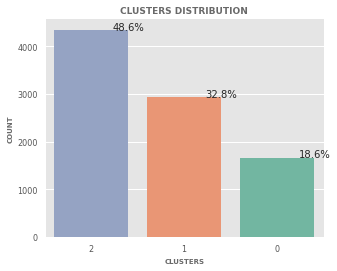

In [100]:
# Plot

plt.figure(figsize=(5,4))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

total = float(df.shape[0])
cores=['#8da0cb', '#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
ax = sns.countplot(x='cluster', data=df, order = df['cluster'].value_counts().index)
sns.despine()
plt.title('CLUSTERS DISTRIBUTION', fontsize = 9, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)
plt.show();

For a more meaningful interpretation, let's evaluate the result of the clusters in original scale and distribution.

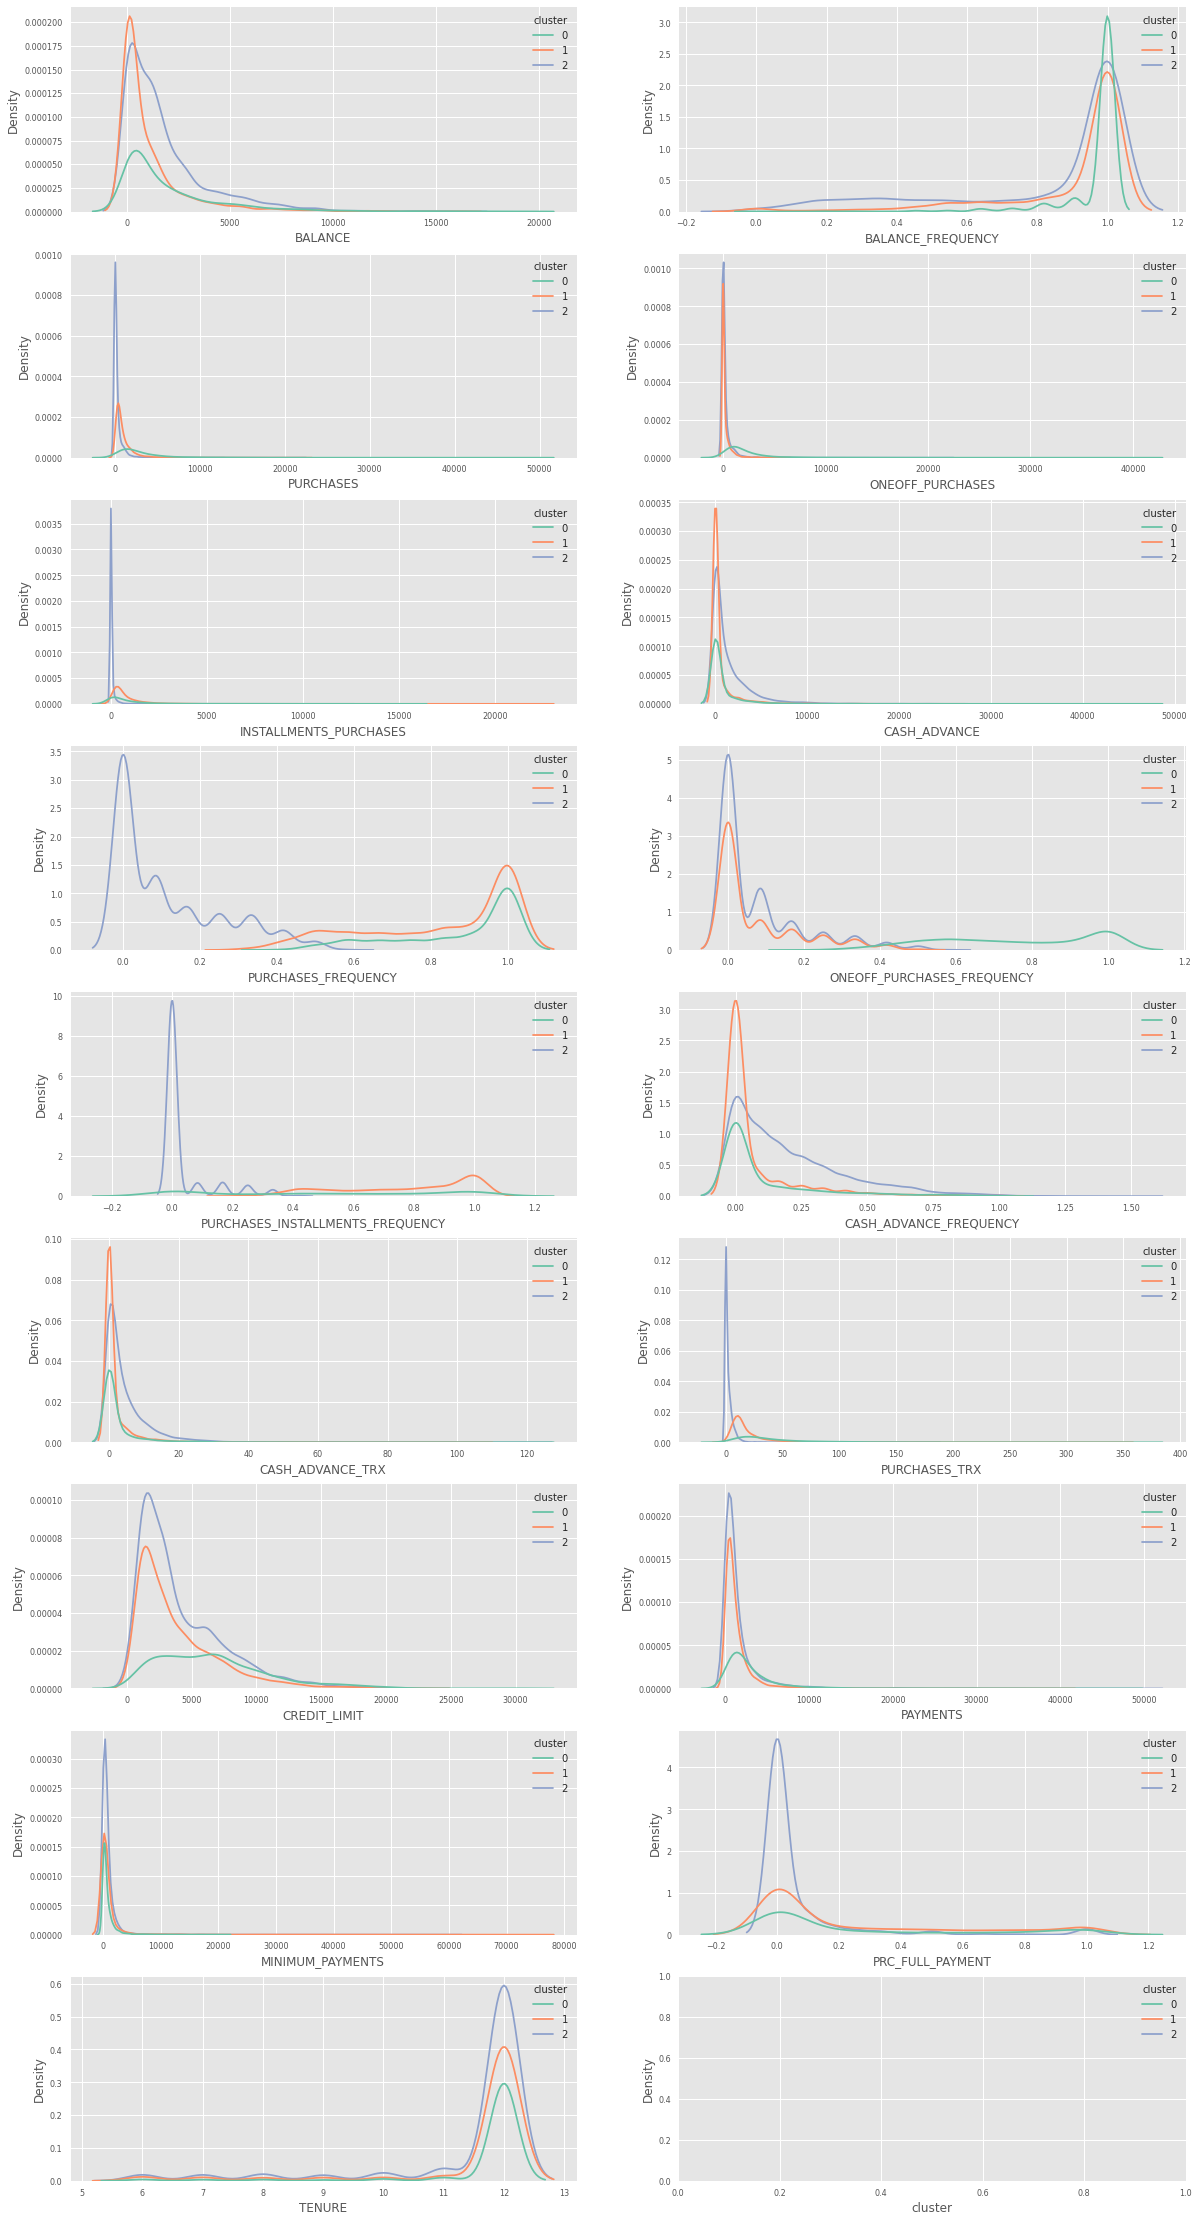

In [101]:
# Plotting columns by clusters
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 2, x)
    sns.kdeplot(data=df, x=d, hue='cluster', palette='Set2')
    x += 1

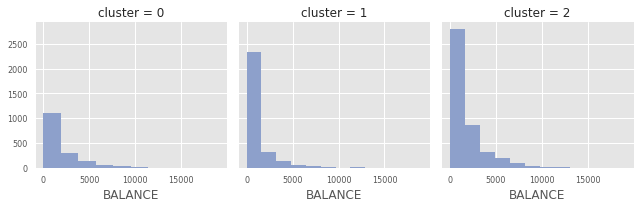

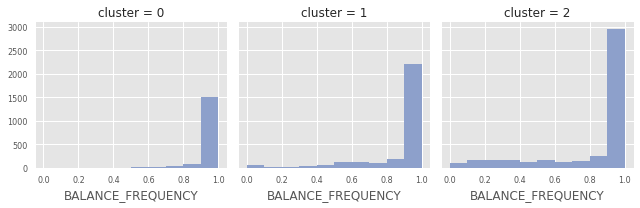

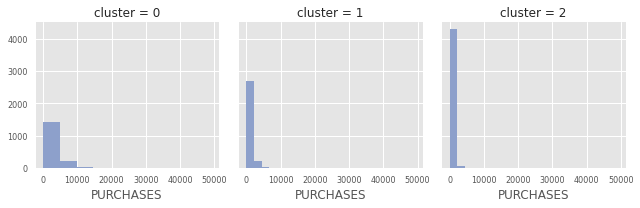

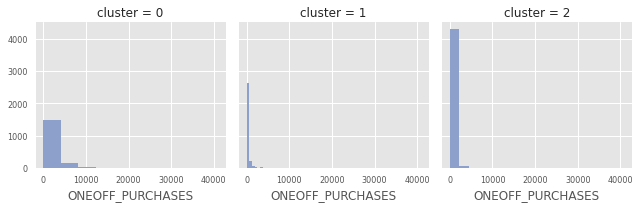

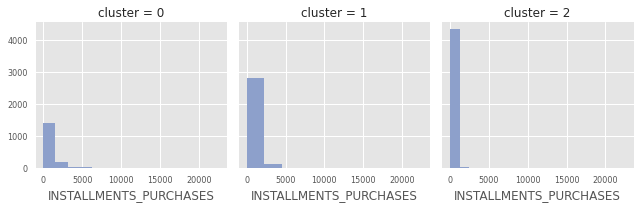

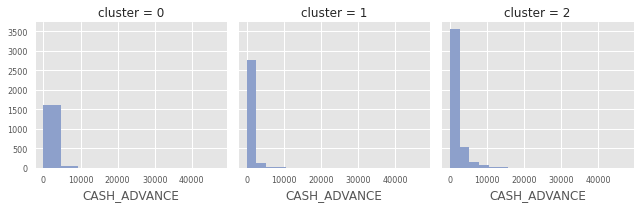

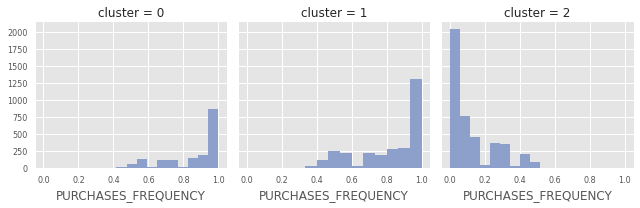

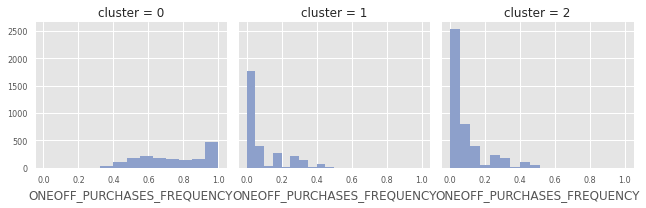

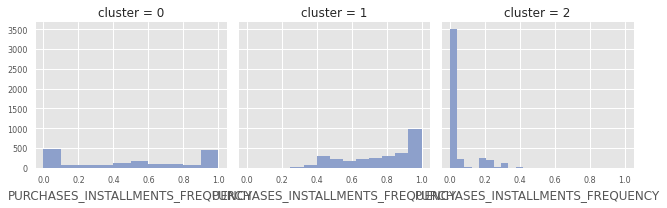

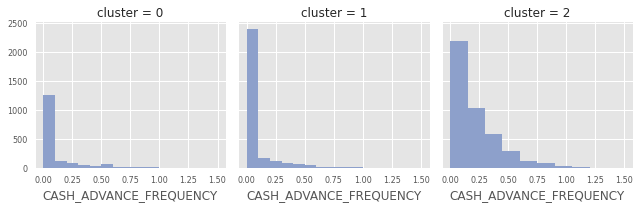

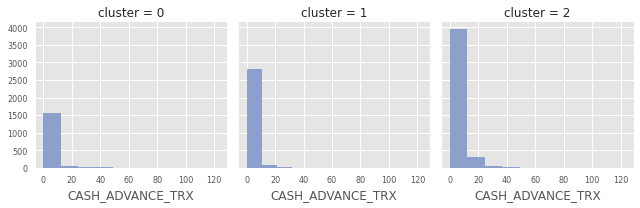

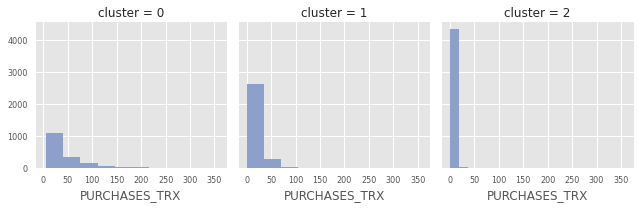

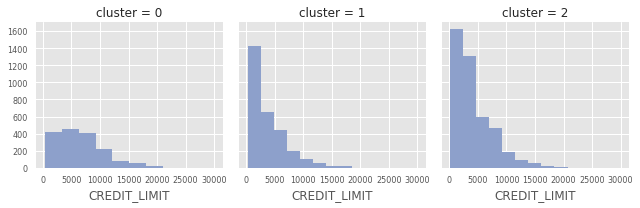

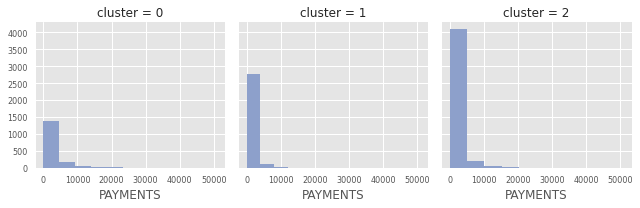

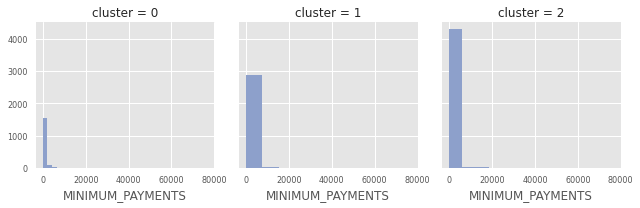

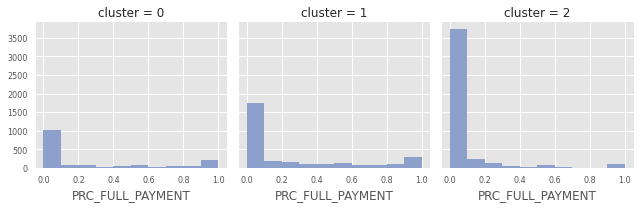

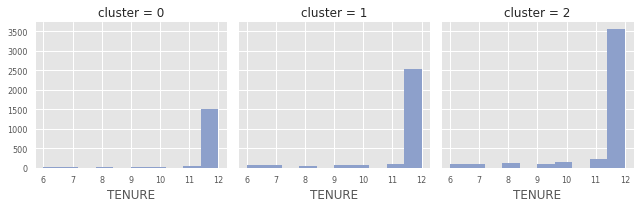

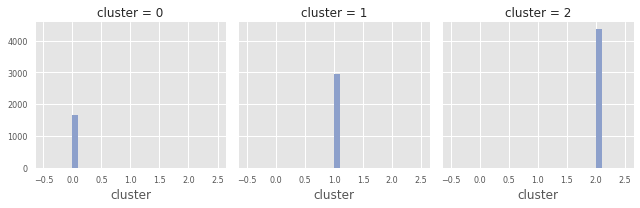

In [102]:
# Distribution of Clusters by columns
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

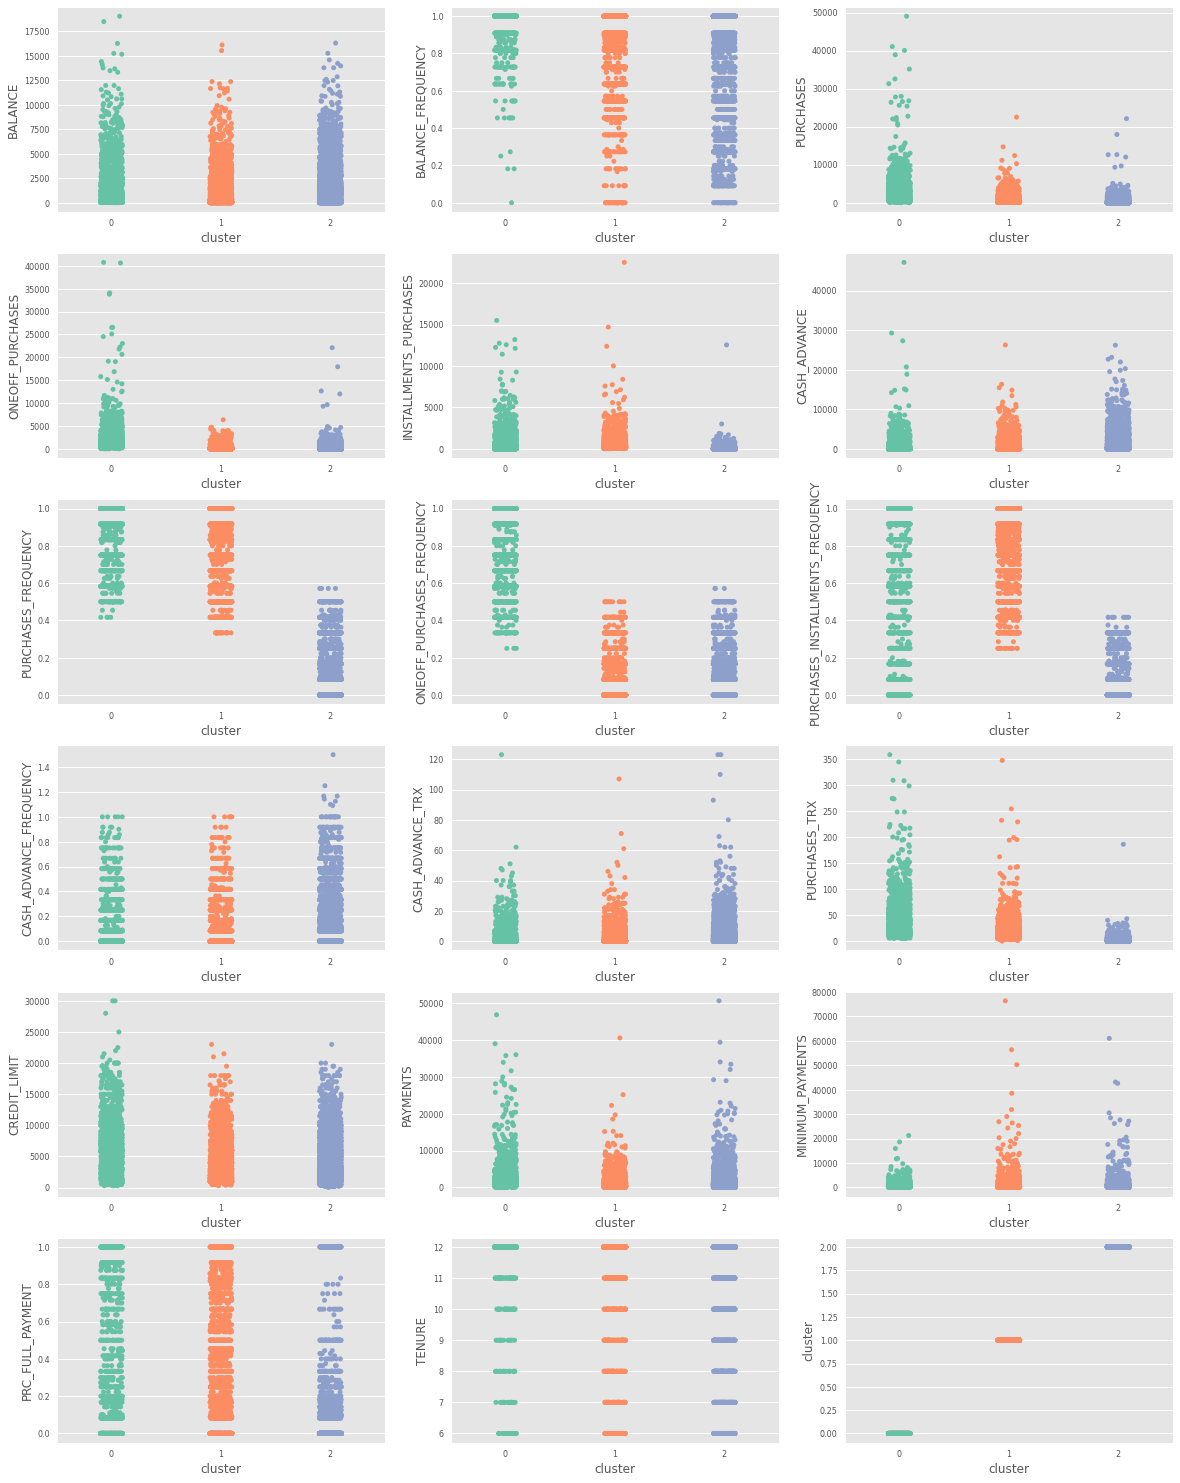

In [103]:
# Plot of clusters by columns
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 3, x)
    sns.stripplot(data=df, x ='cluster', y=d, palette='Set2')
    x += 1

**BALANCE**

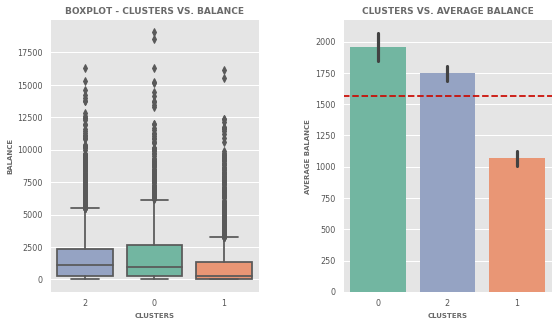

In [104]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE', order = df.groupby(['cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. BALANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('BALANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['BALANCE'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE', data=df, order = df.groupby(['cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE BALANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Highest balance

Customer 1: Lowest balance

Customer 2: Above average balance

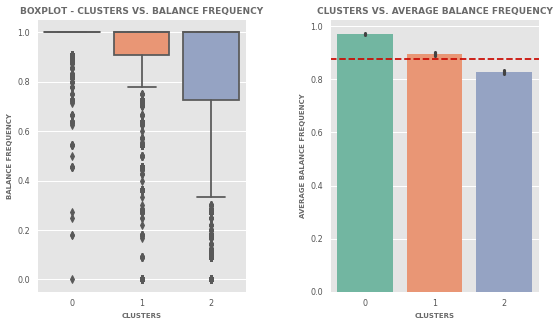

In [105]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. BALANCE FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('BALANCE FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['BALANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE BALANCE FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Client 0: Balance updated more frequently

Client 1: Frequently updated balance slightly above average

Customer 2: Balance updated frequently below average

**PURCHASES**

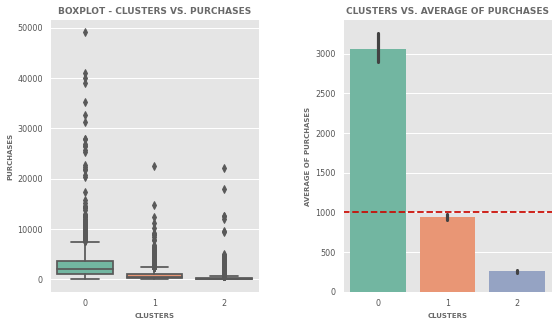

In [106]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE OF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE OF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Value of purchases far above others

Customer 1: Below average purchase value

Customer 2: Very low purchase value

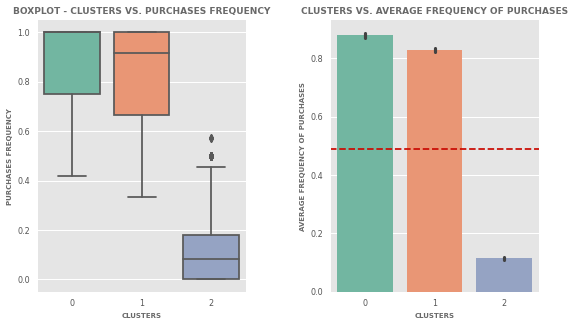

In [107]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY OF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY OF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: High frequency of purchases

Customer 1: High frequency of purchases

Customer 2: Low frequency of purchases

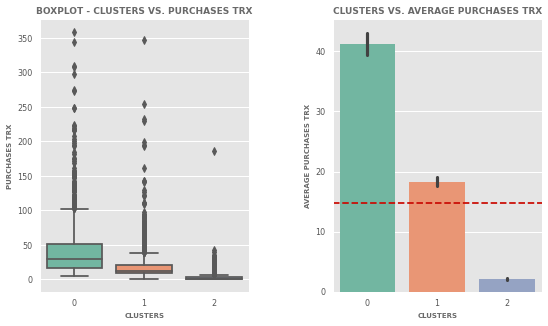

In [108]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES_TRX', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['PURCHASES_TRX'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_TRX', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PURCHASES TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PURCHASES TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Highest number of purchase transactions made

Customer 1: Number of purchase transactions made above average

Customer 2: Lowest number of purchase transactions made

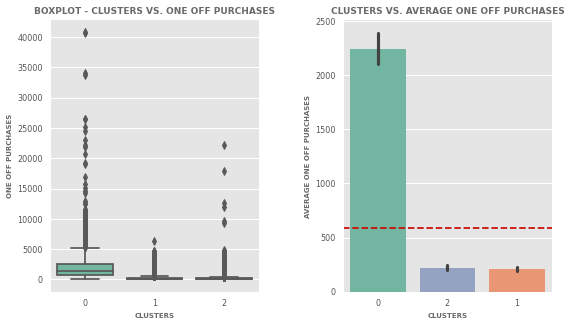

In [109]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES', palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. ONE OFF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('ONE OFF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['ONEOFF_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES', data=df, order = df.groupby(['cluster'])['ONEOFF_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE ONE OFF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE ONE OFF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Value of purchases made at once far above the others

Customer 1: Very cheap one-time purchase price

CUSTOMER 2: Very low value of purchases made at once

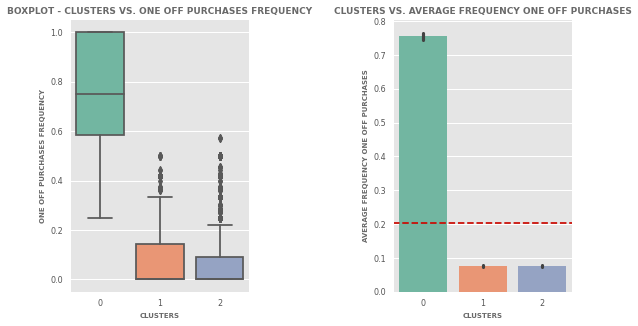

In [110]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. ONE OFF PURCHASES FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('ONE OFF PURCHASES FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['ONEOFF_PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY ONE OFF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY ONE OFF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Client 0: Frequency of purchases made much higher than the others

Customer 1: Very low frequency of purchases made at once

Customer 2: Very low frequency of purchases made at once

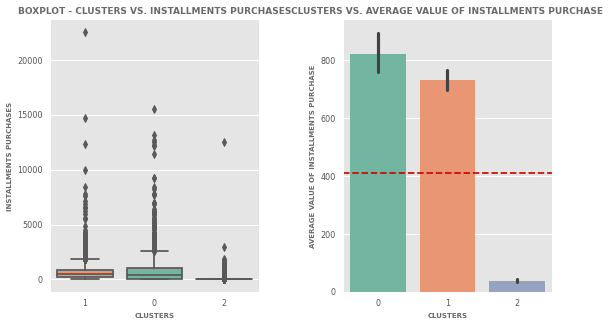

In [111]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='INSTALLMENTS_PURCHASES', order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. INSTALLMENTS PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('INSTALLMENTS PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['INSTALLMENTS_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'INSTALLMENTS_PURCHASES', data=df, palette = 'Set2', order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE VALUE OF INSTALLMENTS PURCHASE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE VALUE OF INSTALLMENTS PURCHASE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Higher value of installment purchases

Customer 1: High value of installment purchases

Customer 2: Low value of installment purchases

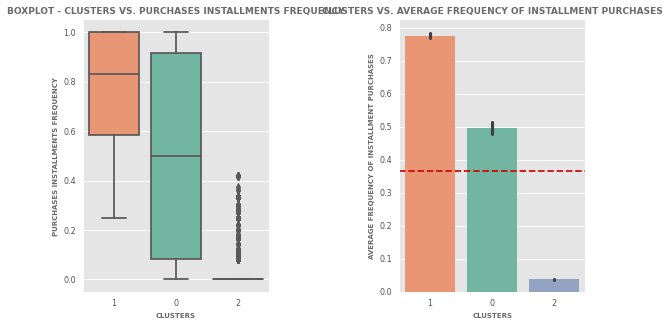

In [112]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='PURCHASES_INSTALLMENTS_FREQUENCY', order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES INSTALLMENTS FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES INSTALLMENTS FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=df, order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY OF INSTALLMENT PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY OF INSTALLMENT PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Customer 0: Frequency of installment purchases above average

Client 1: Higher frequency of installment purchases

Customer 2: Lower frequency of installment purchases

**CASH ADVANCE**

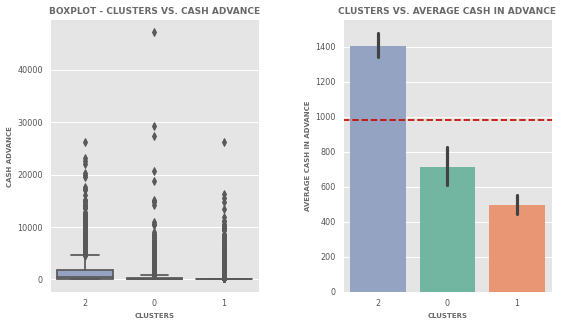

In [113]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE', order = df.groupby(['cluster'])['CASH_ADVANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. CASH ADVANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('CASH ADVANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['CASH_ADVANCE'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CASH IN ADVANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE CASH IN ADVANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Below average cash advance amount

Customer 1: Below average cash advance amount

Customer 2: Higher amount of cash upfront

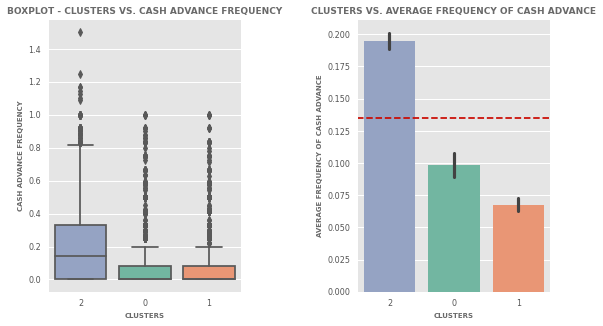

In [114]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE_FREQUENCY', order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. CASH ADVANCE FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('CASH ADVANCE FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['CASH_ADVANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_FREQUENCY', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY OF CASH ADVANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY OF CASH ADVANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.6)
plt.show();

Customer 0: Frequency of cash advance below average

Customer 1: Frequency of cash advance below average

Client 2: High frequency of cash advance

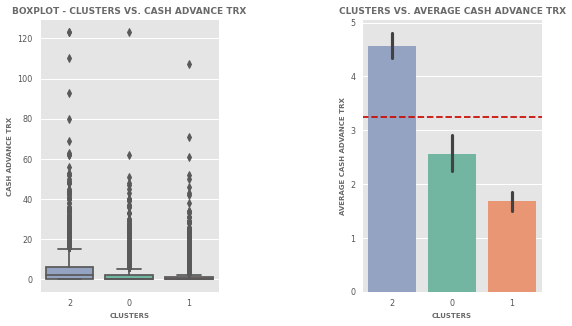

In [115]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE_TRX', order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. CASH ADVANCE TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('CASH ADVANCE TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['CASH_ADVANCE_TRX'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_TRX', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CASH ADVANCE TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE CASH ADVANCE TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Customer 0: Number of transactions carried out with cash in advance below average

Customer 1: Number of transactions carried out with advance cash below average

Customer 2: Greater number of transactions carried out with cash advance

**CREDIT LIMIT**

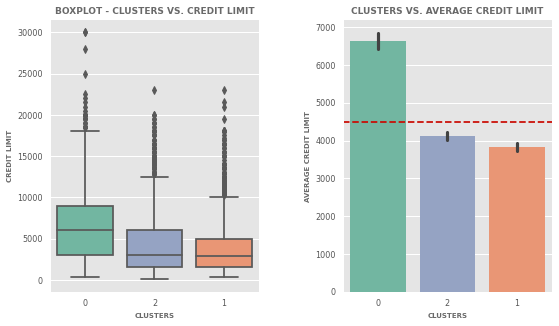

In [116]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CREDIT_LIMIT', order = df.groupby(['cluster'])['CREDIT_LIMIT'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. CREDIT LIMIT', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('CREDIT LIMIT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['CREDIT_LIMIT'])
ax = sns.barplot(x = 'cluster', y = 'CREDIT_LIMIT', data=df, order = df.groupby(['cluster'])['CREDIT_LIMIT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CREDIT LIMIT', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE CREDIT LIMIT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Higher credit card limit

Customer 1: Below average credit card limit

Customer 2: Below average credit card limit

**PAYMENTS**

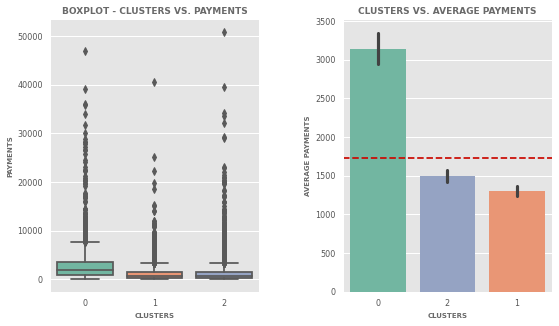

In [117]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PAYMENTS', palette = 'Set2', order = df.groupby(['cluster'])['PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'PAYMENTS', data=df, order = df.groupby(['cluster'])['PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Customer 0: Highest payment amount made by the user

Customer 1: Payment amount made by user below average

Customer 2: Payment amount made by user below average

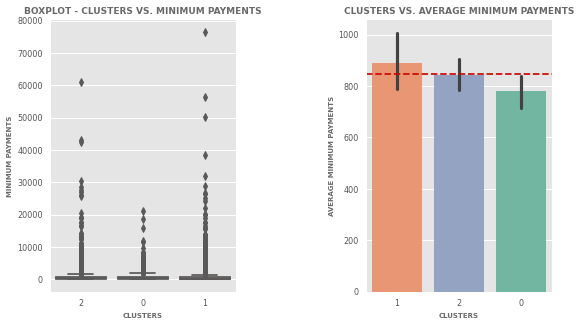

In [118]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='MINIMUM_PAYMENTS', order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. MINIMUM PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MINIMUM PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#fc8d62', '#8da0cb', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['MINIMUM_PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'MINIMUM_PAYMENTS', data=df, order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE MINIMUM PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE MINIMUM PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Customer 0: Minimum amount of payments made by the user below average

Customer 1: Highest minimum amount of payments made by the user

Customer 2: Minimum amount of payments made by the user slightly below average

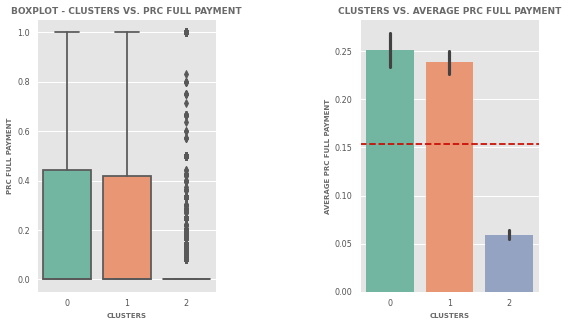

In [119]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PRC_FULL_PAYMENT', palette = 'Set2', order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PRC FULL PAYMENT', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PRC FULL PAYMENT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['PRC_FULL_PAYMENT'])
ax = sns.barplot(x = 'cluster', y = 'PRC_FULL_PAYMENT', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PRC FULL PAYMENT', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PRC FULL PAYMENT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Customer 0: Highest percentage of full payment paid by user

Customer 1: High percentage of full payment paid by user

Customer 2: Very low percentage of full payment paid by user

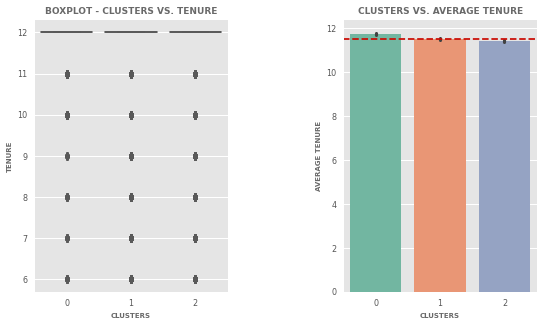

In [120]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='TENURE', palette = 'Set2', order = df.groupby(['cluster'])['TENURE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. TENURE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('TENURE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
mean = np.mean(df['TENURE'])
ax = sns.barplot(x = 'cluster', y = 'TENURE', data=df, palette = 'Set2', order = df.groupby(['cluster'])['TENURE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE TENURE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE TENURE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.6)
plt.show();

Tenure of credit card service to the user almost equal all customers.

In summary, through the interpretation of the graphs, we can infer that:

- **Customer 0:** The main characteristic that differentiates this group from the others is that they have a high balance that is frequently updated, have a higher credit card limit, make a much higher number of purchases than the others and with high frequency, both in purchases made in a single time as in purchases in installments and are the ones who make full payments the most.

- **Customer 1:** The highlight of this group is that they have the lowest credit limit and balance among all, however, they tend to keep their balance updated frequently, as they are the second group that makes the most purchases and these purchases are often paid in installments. They are also the ones with the highest amount of minimum payouts, but they also make above-average full payouts.

- **Customer 2:** What stands out in this group is that despite having an above average balance and the second highest credit limit among the groups, they are the ones whose balance is updated less frequently, as they do not make purchases in general. . However, they are the ones who use the most money in advance compared to the others and still make the full payment far below average.

This grouping helps companies to identify different categories of customers and, based on that, adjust marketing strategies appropriate for each specific case.